# Машинное обучение, ФКН ВШЭ

## Практическое задание 2. Exploratory Data Analysis и линейная регрессия

### Общая информация
Дата выдачи: 05.10.2023

Мягкий дедлайн: 23:59MSK 18.10.2023

Жесткий дедлайн: 23:59MSK 22.10.2022

### О задании
В этом задании мы попытаемся научиться анализировать данные и выделять из них полезные признаки. Мы также научимся пользоваться `seaborn` и `sklearn`, а заодно привыкнем к основным понятиям машинного обучения.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов. Проверяющий имеет право снизить оценку за неэффективную реализацию или неопрятные графики.

**Обратите внимание**, что в каждом разделе домашнего задания есть оцениваниемые задачи и есть вопросы. Вопросы дополняют задачи и направлены на то, чтобы проинтерпретировать или обосновать происходящее. Код без интерпретации не имеет смысла, поэтому отвечать на вопросы обязательно — за отсутствие ответов мы будем снижать баллы за задачи. Если вы ответите на вопросы, но не напишете корректный код к соответствующим оцениваемым задачам, то баллы за такое выставлены не будут.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-02-linregr-Username.ipynb, где Username — ваша фамилия.

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

Оценка: xx.

В этом ноутбуке используется библиотека `folium` для визуализации карт. Она работает в google colab!

In [1]:
!pip install folium

In [2]:
import folium

m = folium.Map(location=(55.7522200, 37.6155600), zoom_start=10)

m

Если вы всё сделали правильно, то выше должна открыться карта Москвы.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set(style="darkgrid")

np.random.seed(0)

## Часть 0. Подготовка (1 балл)

**Задание 1 (1 балл)**. Мы будем работать с данными из соревнования [New York City Taxi Trip Duration](https://www.kaggle.com/c/nyc-taxi-trip-duration/overview), в котором нужно было предсказать длительность поездки на такси. Скачайте обучающую выборку из этого соревнования и загрузите ее:

In [4]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
!pip install -q kaggle

In [5]:
df = pd.read_csv(r"C:\Users\annam\Downloads\train\train.csv")

In [6]:
df.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

In [7]:
# df = df.drop(columns = ['dropoff_datetime'])
df['pickup_datetime'] = df['pickup_datetime'].apply(lambda x: pd.to_datetime(x))
df

id  vendor_id     pickup_datetime     dropoff_datetime  \
0        id2875421          2 2016-03-14 17:24:55  2016-03-14 17:32:30   
1        id2377394          1 2016-06-12 00:43:35  2016-06-12 00:54:38   
2        id3858529          2 2016-01-19 11:35:24  2016-01-19 12:10:48   
3        id3504673          2 2016-04-06 19:32:31  2016-04-06 19:39:40   
4        id2181028          2 2016-03-26 13:30:55  2016-03-26 13:38:10   
...            ...        ...                 ...                  ...   
1458639  id2376096          2 2016-04-08 13:31:04  2016-04-08 13:44:02   
1458640  id1049543          1 2016-01-10 07:35:15  2016-01-10 07:46:10   
1458641  id2304944          2 2016-04-22 06:57:41  2016-04-22 07:10:25   
1458642  id2714485          1 2016-01-05 15:56:26  2016-01-05 16:02:39   
1458643  id1209952          1 2016-04-05 14:44:25  2016-04-05 14:47:43   

         passenger_count  pickup_longitude  pickup_latitude  \
0                      1        -73.982155        40.767937   
1                      1        -73.980415        40.738564   
2                      1        -73.979027        40.763939   
3                      1        -74.010040        40.719971   
4                      1        -73.973053        40.793209   
...                  ...               ...              ...   
1458639                4        -73.982201        40.745522   
1458640                1        -74.000946        40.747379   
1458641                1        -73.959129        40.768799   
1458642                1        -73.982079        40.749062   
1458643                1        -73.979538        40.781750   

         dropoff_longitude  dropoff_latitude store_and_fwd_flag  trip_duration  
0               -73.964630         40.765602                  N            455  
1               -73.999481         40.731152                  N            663  
2               -74.005333         40.710087                  N           2124  
3               -74.012268         40.706718                  N            429  
4               -73.972923         40.782520                  N            435  
...                    ...               ...                ...            ...  
1458639         -73.994911         40.740170                  N            778  
1458640         -73.970184         40.796547                  N            655  
1458641         -74.004433         40.707371                  N            764  
1458642         -73.974632         40.757107                  N            373  
1458643         -73.972809         40.790585                  N            198  

[1458644 rows x 11 columns]

In [8]:
df.dtypes

id                            object
vendor_id                      int64
pickup_datetime       datetime64[ns]
dropoff_datetime              object
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag            object
trip_duration                  int64
dtype: object

Обратите внимание на колонки `pickup_datetime` и `dropoff_datetime`. `dropoff_datetime` был добавлена организаторами только в обучающую выборку, то есть использовать эту колонку нельзя, давайте удалим ее. В `pickup_datetime` записаны дата и время начала поездки. Чтобы с ней было удобно работать, давайте преобразуем даты в `datetime`-объекты

В колонке `trip_duration` записано целевое значение, которое мы хотим предсказывать. Давайте посмотрим на распределение таргета в обучающей выборке. Для этого нарисуйте его гистограмму:

Text(0, 0.5, 'amount of trips')

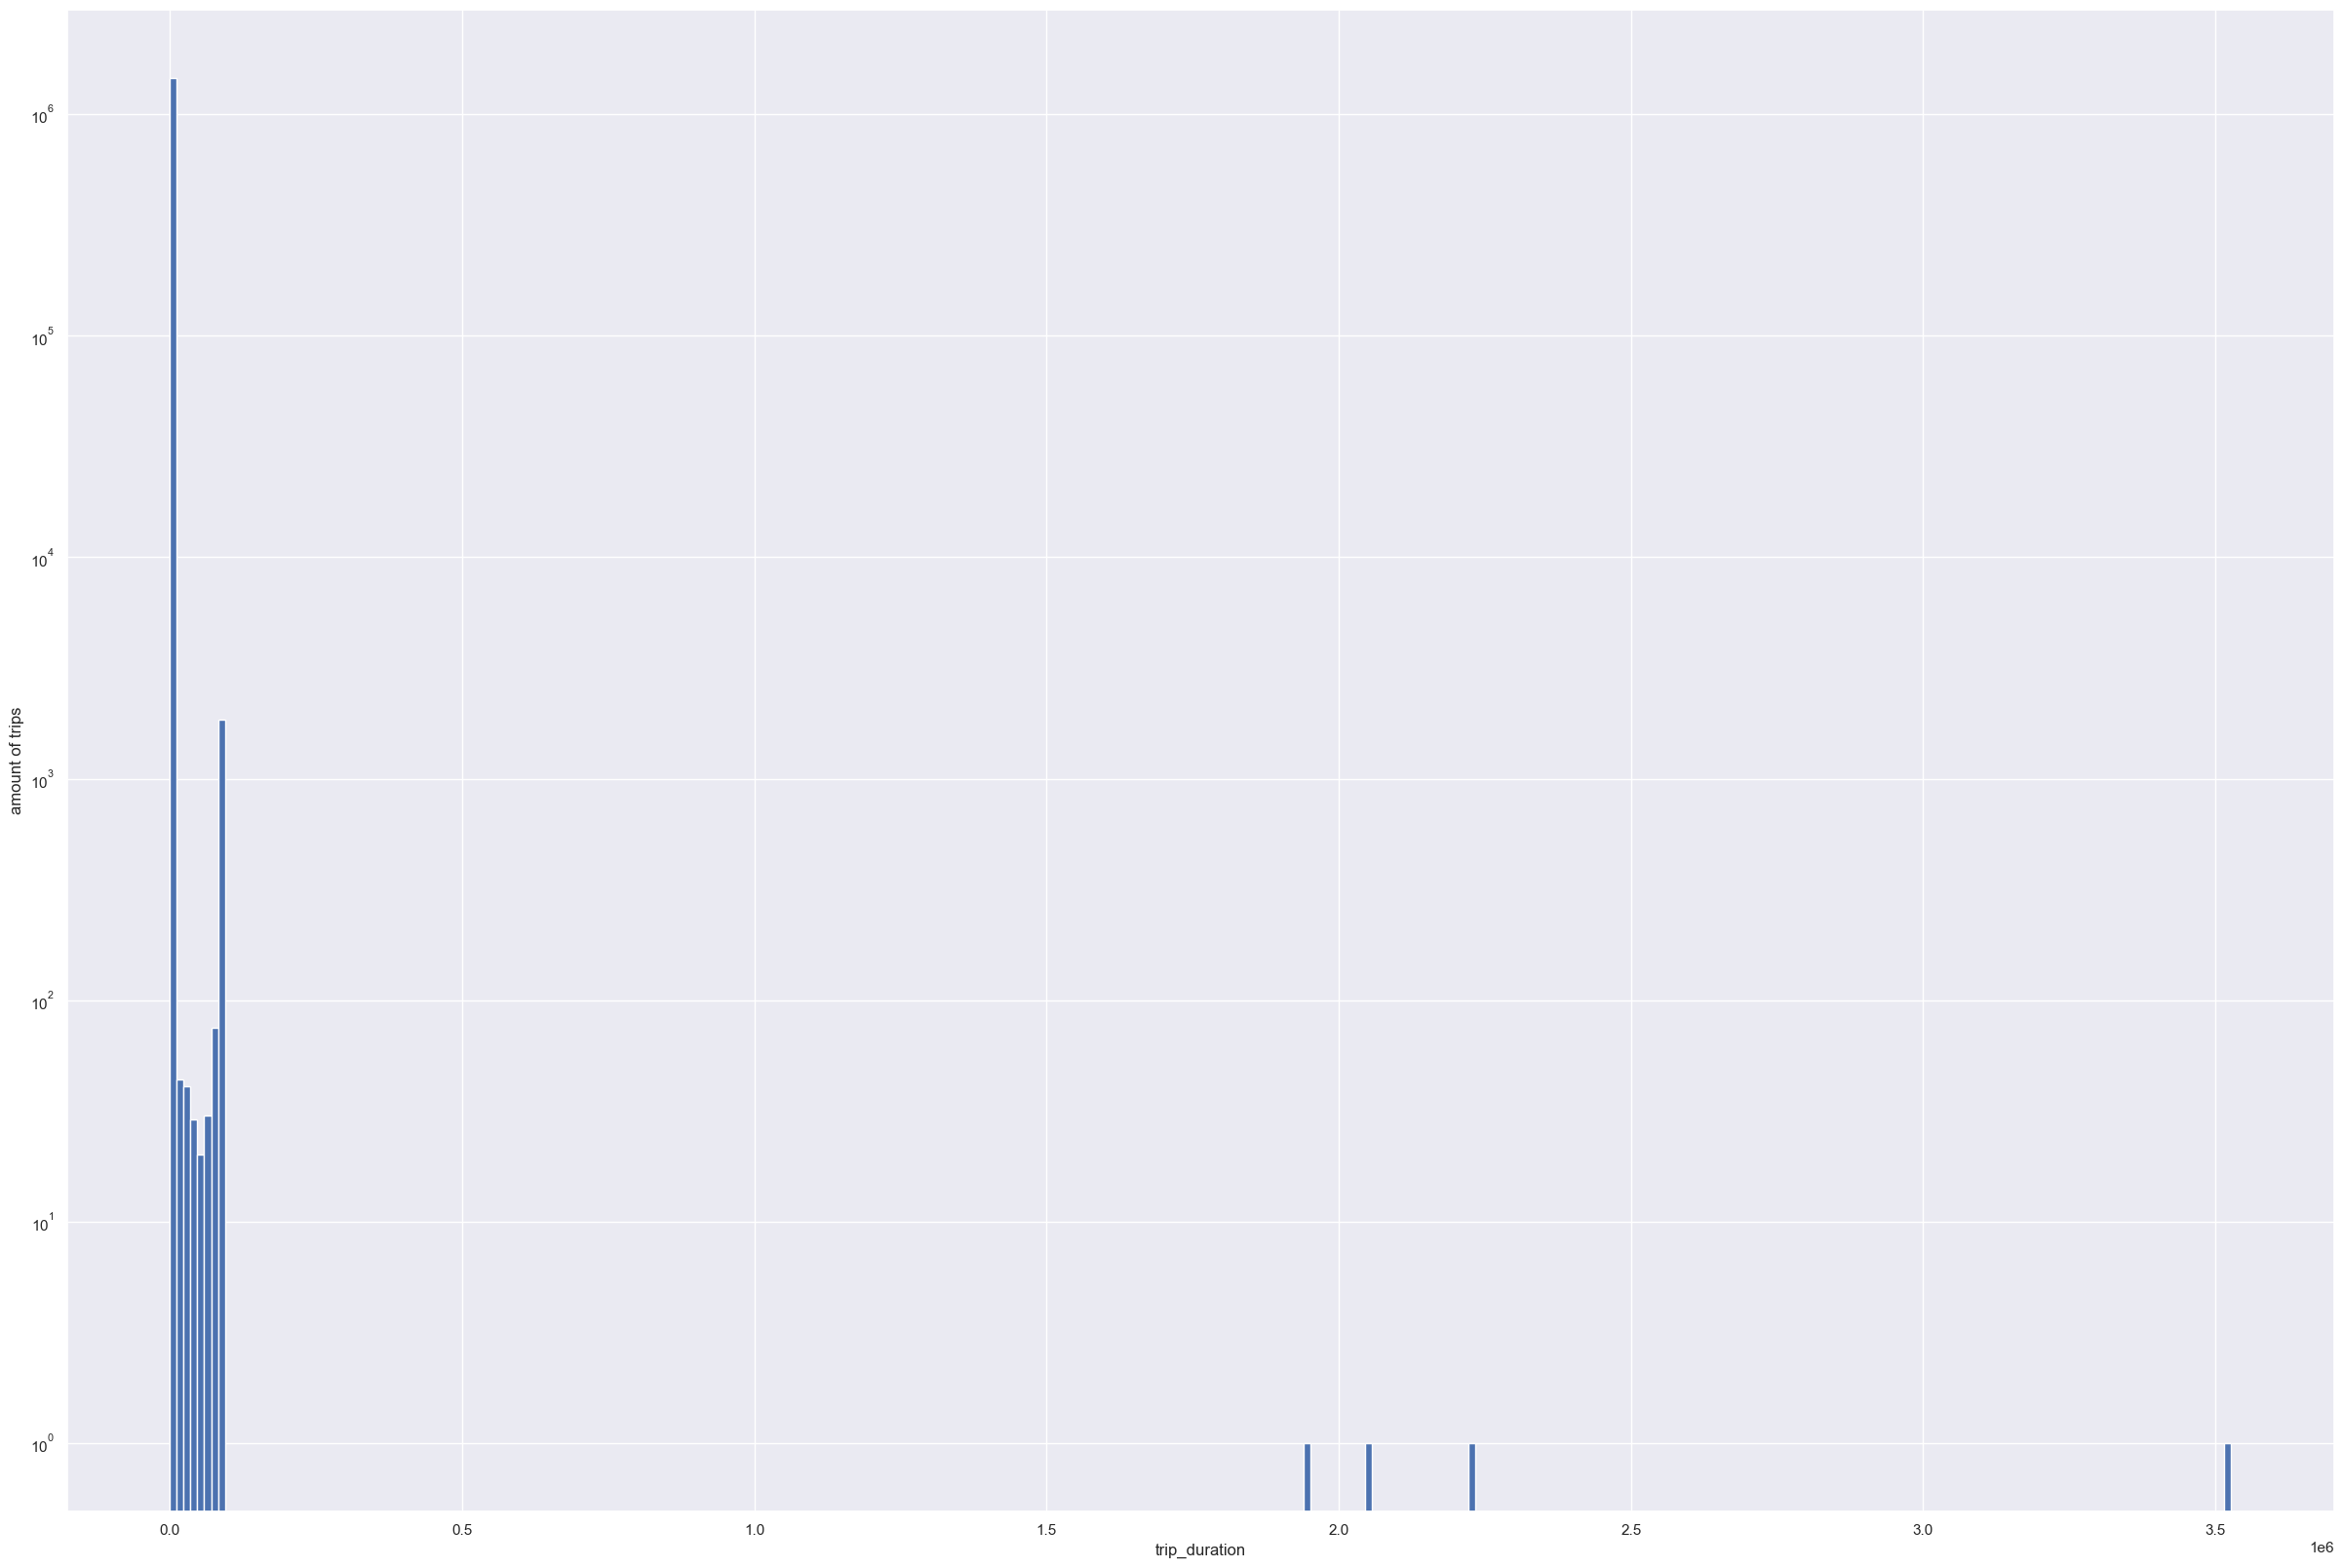

In [9]:
plt.figure(figsize=(30,20))
plt.hist(df['trip_duration'], bins = 300, log = True)
plt.xlabel('trip_duration')
plt.ylabel('amount of trips')

**Вопрос**: Что можно сказать о целевой переменной по гистограмме её значений?

В соревновании в качестве метрики качества использовалось RMSLE:
$$\text{RMSLE}(X, y, a) = \sqrt{\frac{1}{\ell}\sum_{i=1}^{\ell} \big(\log{(y_i + 1)} - \log{(a(x_i) + 1)}\big)^2}$$

**Вопрос**: Как вы думаете, почему авторы соревнования выбрали именно RMSLE, а не RMSE?

На семинаре мы рассматривали несколько моделей линейной регрессии в `sklearn`, но каждая из них оптимизировала среднеквадратичную ошибку (MSE), а не RMSLE. Давайте проделаем следующий трюк: будем предсказывать не целевую переменную, а ее *логарифм*. Обозначим $\hat{y}_i = \log{(y_i + 1)}$ — модифицированный таргет, а $\hat{a}(x_i)$ — предсказание модели, которая обучалась на $\hat{y}_i$, то есть логарифм таргета. Чтобы предсказать исходное значение, мы можем просто взять экспоненту от нашего предсказания: $a(x_i) = \exp(\hat{a}(x_i)) - 1$.

**Вопрос**: Покажите, что оптимизация RMSLE для модели $a$ эквивалентна оптимизации MSE для модели $\hat{a}$.

**Доказательство**: ╰( ͡° ͜ʖ ͡° )つ──☆*: 
    m

Итак, мы смогли свести задачу оптимизации RMSLE к задаче оптимизации MSE, которую мы умеем решать! Кроме того, у логарифмирования таргета есть еще одно полезное свойство. Чтобы его увидеть, добавьте к нашей выборке колонку `log_trip_duration` (воспользуйтесь `np.log1p`) и нарисуйте гистограмму модифицированного таргета по обучающей выборке. Удалите колонку со старым таргетом.

In [10]:
df['log_trip_duration'] = np.log1p(df['trip_duration'])

Text(0, 0.5, 'amount of trips')

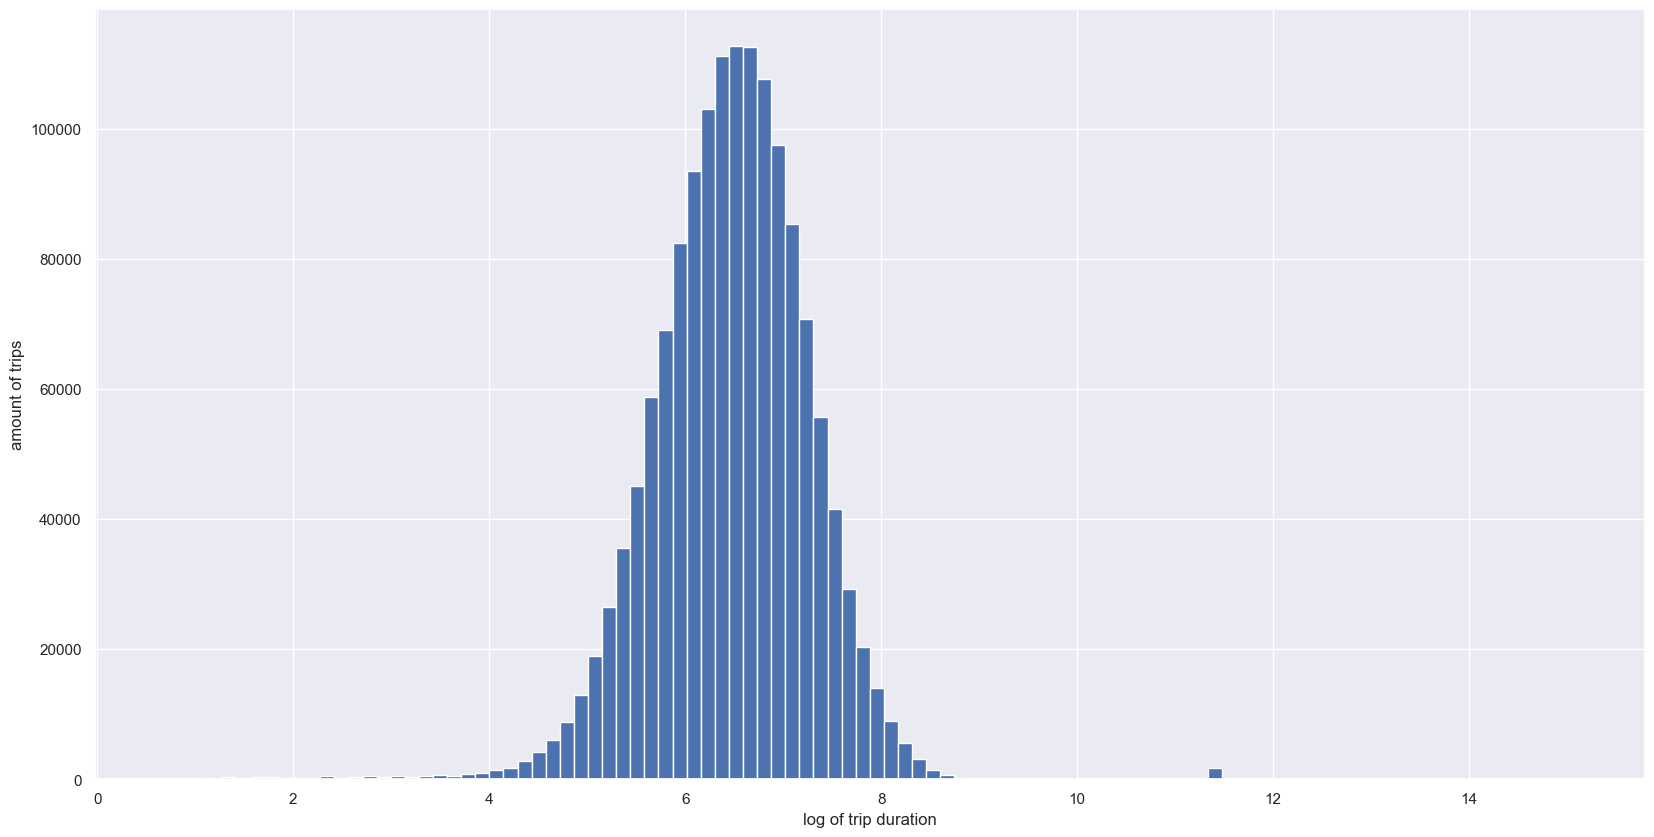

In [11]:
plt.figure(figsize = (20, 10))
plt.hist(df['log_trip_duration'], bins = 100)
plt.xlabel('log of trip duration')
plt.ylabel('amount of trips')

Чтобы иметь некоторую точку отсчета, давайте посчитаем значение метрики при наилучшем константном предсказании:

In [12]:
def rmsle(log1p_y_true, log1p_y_pred): 
    l = len(log1p_y_true)
    s = 0
    for i in range(l):
        s += (log1p_y_true[i] - log1p_y_pred[i])**2
    return ((float(s)/l)**0.5)
    raise NotImplementedError

rmsle_best_const = rmsle([df['log_trip_duration'].mean()] * df['log_trip_duration'].shape[0], list(df['log_trip_duration'].values))
print(rmsle_best_const)
assert np.allclose(rmsle_best_const, 0.79575, 1e-4)

0.795759236541271


## Часть 1. Изучаем `pickup_datetime` (2 балла)

**Задание 2 (0.25 баллов)**. Для начала давайте посмотрим, сколько всего было поездок в каждый из дней. Постройmте график зависимости количества поездок от дня в году (например, можно воспользоваться `sns.countplot`):

In [13]:
df['day_of_year'] = df['pickup_datetime'].apply(lambda x: x.day_of_year)

<Axes: xlabel='day_of_year', ylabel='count'>

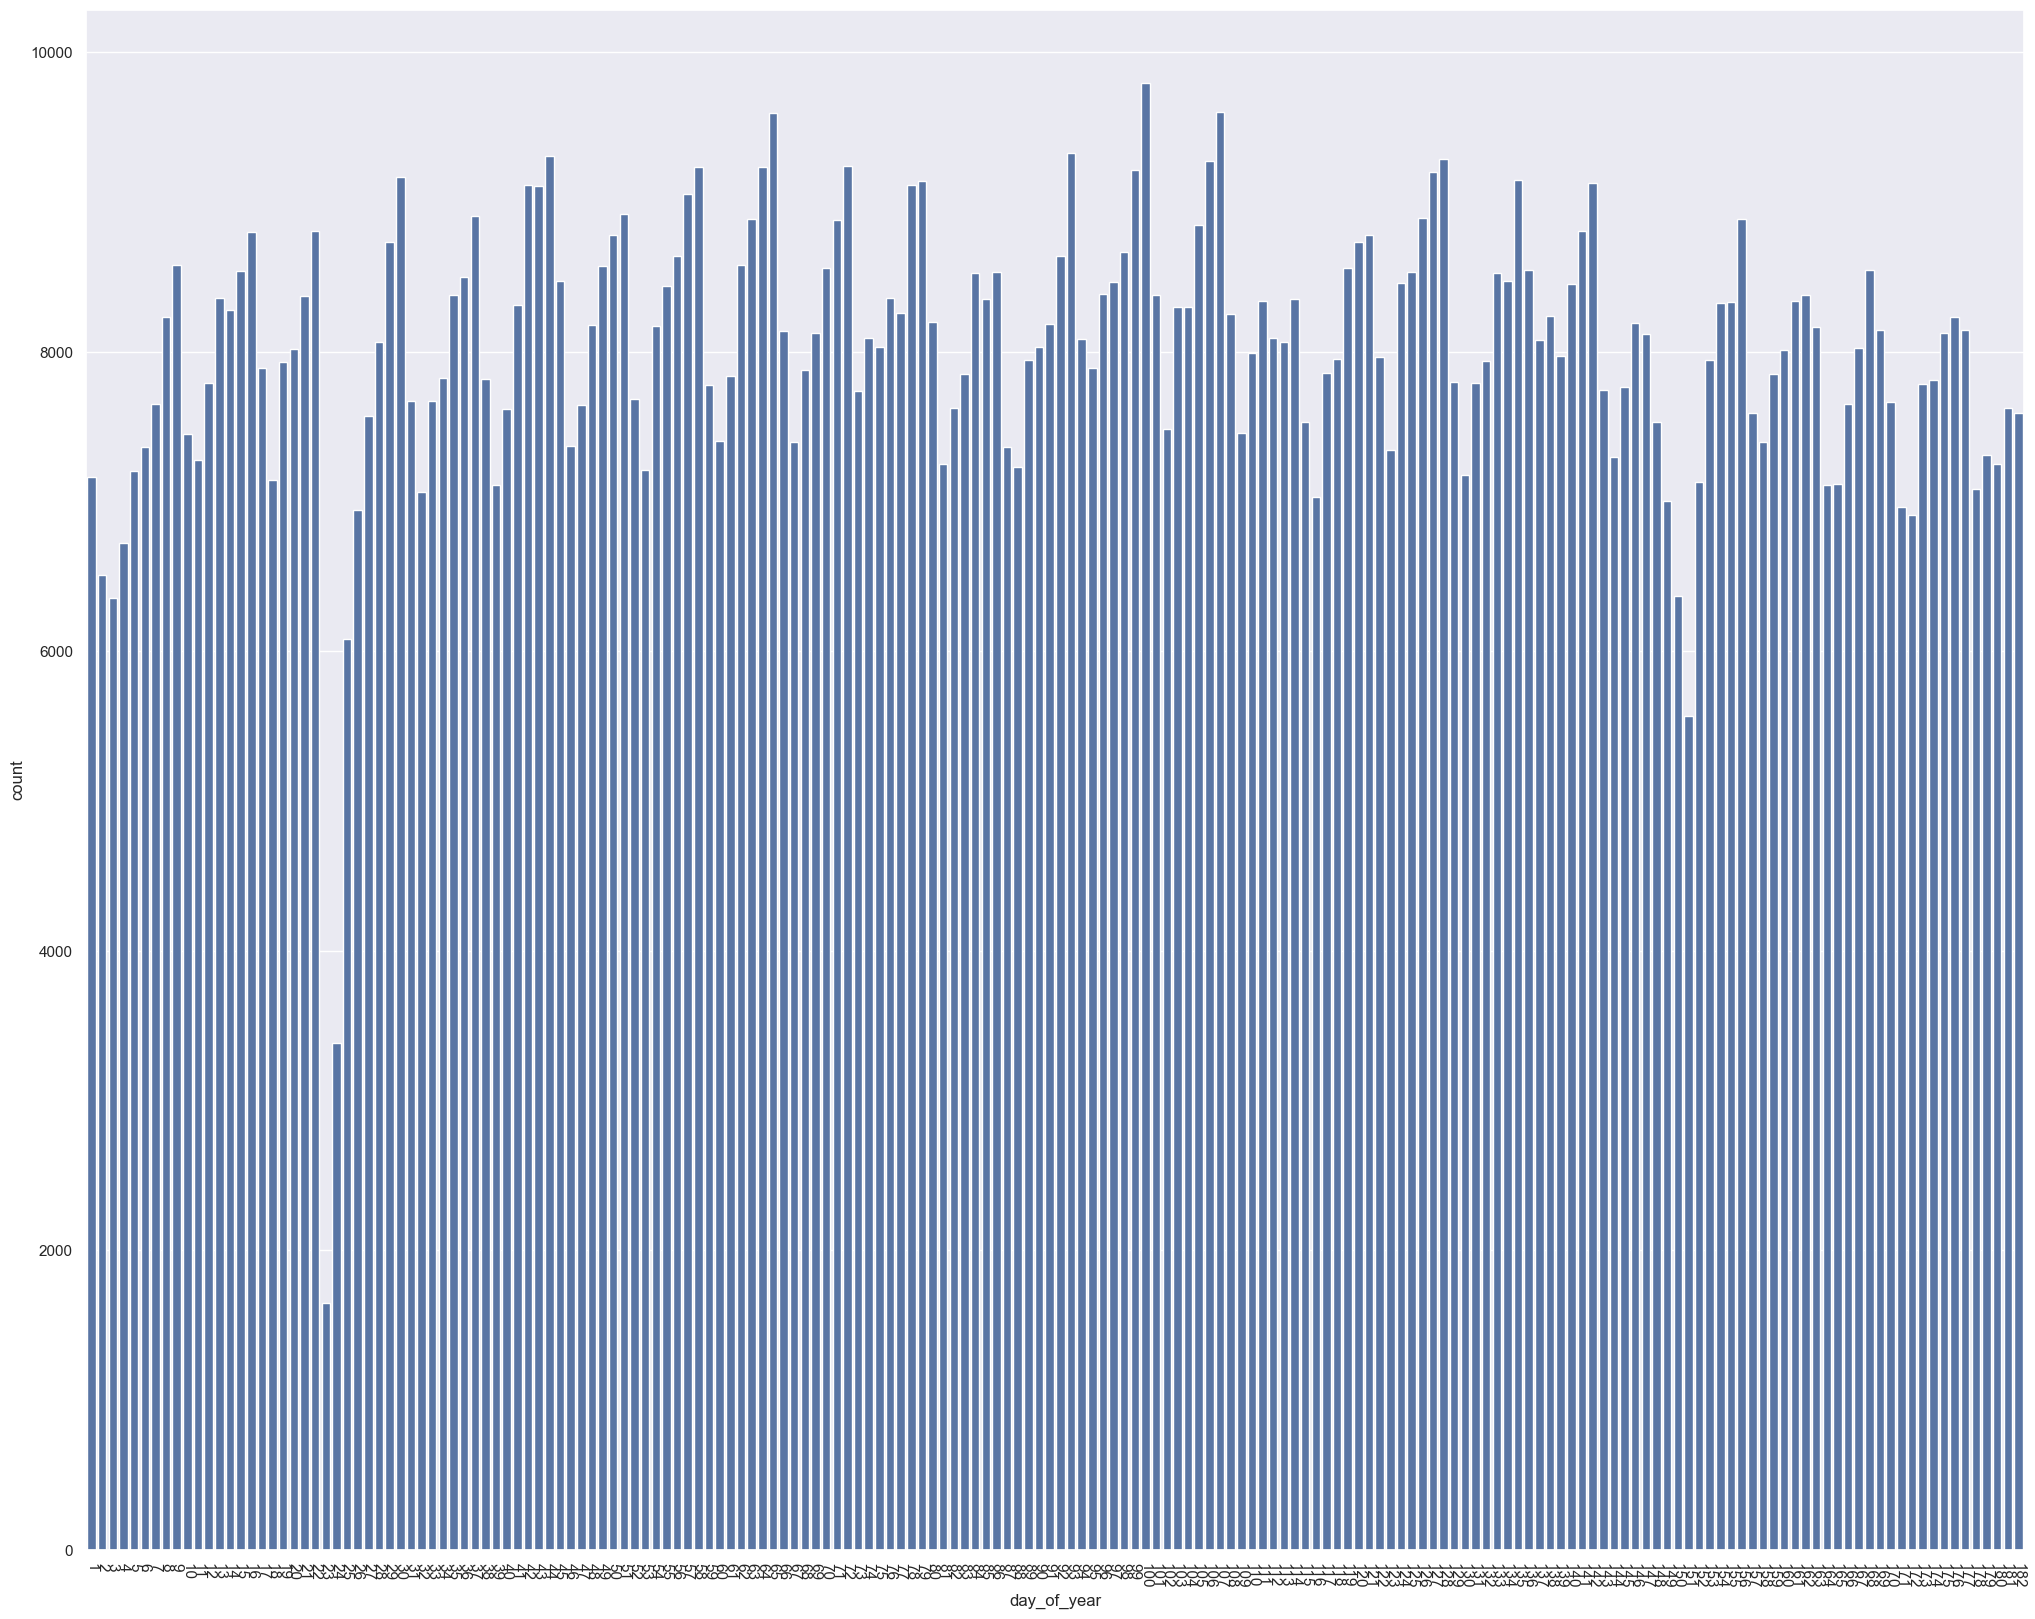

In [14]:
plt.figure(figsize = (25, 20))
plt.xticks(rotation= -90)
sns.countplot(data = df, x = 'day_of_year')

**Вопрос**: Вы, вероятно, заметили, что на графике есть 2 периода с аномально маленькими количествами поездок. Вычислите, в какие даты происходили эти скачки вниз и найдите информацию о том, что происходило в эти дни в Нью-Йорке.

Нарисуйте графики зависимости количества поездок от дня недели и от часов в сутках (воспользуйтесь `sns.relplot`):

In [15]:
df['day_of_week'] = df['pickup_datetime'].apply(lambda x: x.day_of_week)

In [16]:
df['hour'] = df['pickup_datetime'].apply(lambda x: x.hour)

In [17]:
df_for_sns_relplot = df.groupby(by = ['day_of_week', 'hour']).aggregate({'id' : 'count'}).reset_index().rename(columns = {'id' : 'count'})

In [18]:
df_for_sns_relplot

day_of_week  hour  count
0              0     0   4299
1              0     1   2578
2              0     2   1658
3              0     3   1226
4              0     4   1351
..           ...   ...    ...
163            6    19  10046
164            6    20   9136
165            6    21   8737
166            6    22   7892
167            6    23   6367

[168 rows x 3 columns]

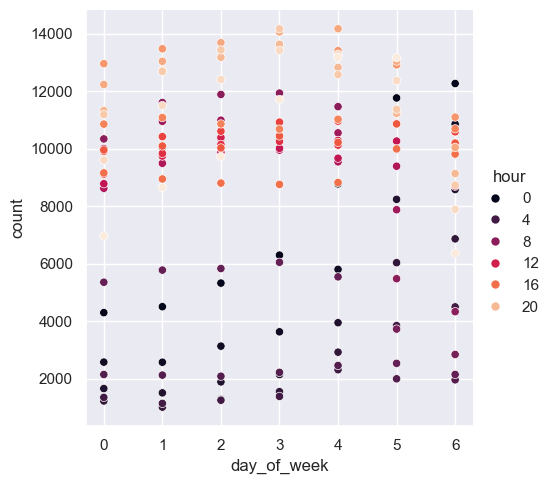

In [19]:
sns.relplot(data=df_for_sns_relplot, x="day_of_week", y="count", hue="hour", palette='rocket')

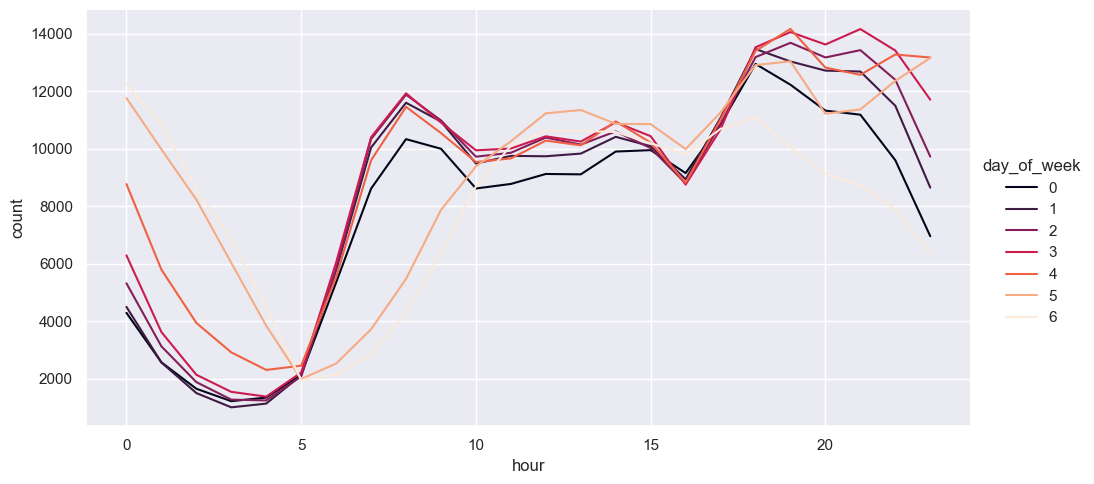

In [20]:
sns.set_style("darkgrid")
sns.relplot(data=df_for_sns_relplot, x="hour", y="count", hue="day_of_week", palette='rocket', aspect=2, kind = 'line')

**Задание 3 (0.5 баллов)**. Нарисуйте на одном графике зависимости количества поездок от часа в сутках для разных месяцев (разные кривые, соответствующие разным месяцам, окрашивайте в разные цвета, воспользуйтесь `hue` в `sns.relplot`). Аналогично нарисуйте зависимости количества поездок от часа в сутках для разных дней недели.

In [21]:
df['month'] = df['pickup_datetime'].apply(lambda x: x.month)

In [22]:
df_hours_month = df.groupby(by = ['hour', 'month']).aggregate({'id' : 'count'}).reset_index().rename(columns = {'id' : 'count'})

In [23]:
df_hours_month

hour  month  count
0       0      1   8330
1       0      2   8445
2       0      3   8992
3       0      4   9185
4       0      5   9146
..    ...    ...    ...
139    23      2  11042
140    23      3  12172
141    23      4  12503
142    23      5  11928
143    23      6  11899

[144 rows x 3 columns]

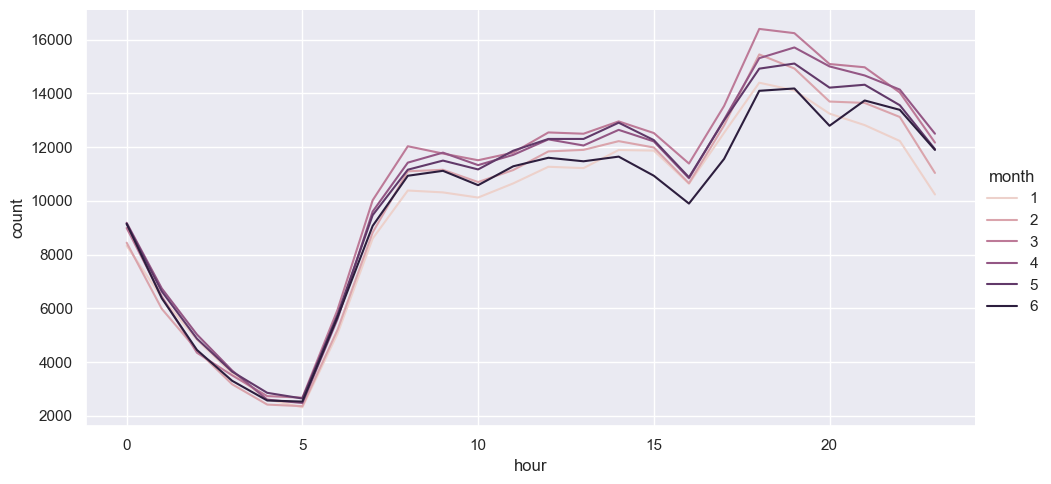

In [24]:
sns.relplot(data = df_hours_month, x = 'hour', y = 'count', hue = 'month', kind = 'line', aspect=2)

**Вопрос**: Какие выводы можно сделать, основываясь на графиках выше? Выделяются ли какие-нибудь дни недели? Месяца? Время суток? С чем это связано?

**Задание 4 (0.5 баллов)**. Разбейте выборку на обучающую и тестовую в отношении 7:3 (используйте `train_test_split` из `sklearn`). По обучающей выборке нарисуйте график зависимости среднего логарифма времени поездки от дня недели. Затем сделайте то же самое, но для часа в сутках и дня в году.

In [25]:
Y = df['log_trip_duration']
X = df.drop(columns = ['log_trip_duration'])

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3)

In [27]:
s_day_week = pd.concat([X_train, Y_train], axis=1).groupby('day_of_week').aggregate({'log_trip_duration' : 'mean'}).reset_index()

In [28]:
s_time = pd.concat([X_train, Y_train], axis=1).groupby('hour').aggregate({'log_trip_duration' : 'mean'}).reset_index()

In [29]:
s_day_of_year = pd.concat([X_train, Y_train], axis=1).groupby('day_of_year').aggregate({'log_trip_duration' : 'mean'}).reset_index()

Text(0, 0.5, 'mean')

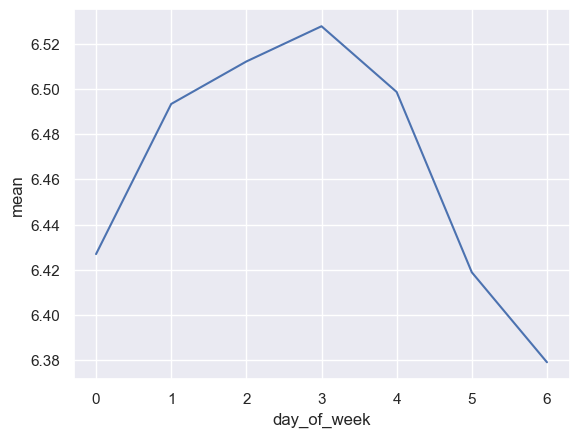

In [30]:
plt.plot(s_day_week.day_of_week, s_day_week.log_trip_duration)
plt.xlabel('day_of_week')
plt.ylabel('mean')

Text(0, 0.5, 'mean')

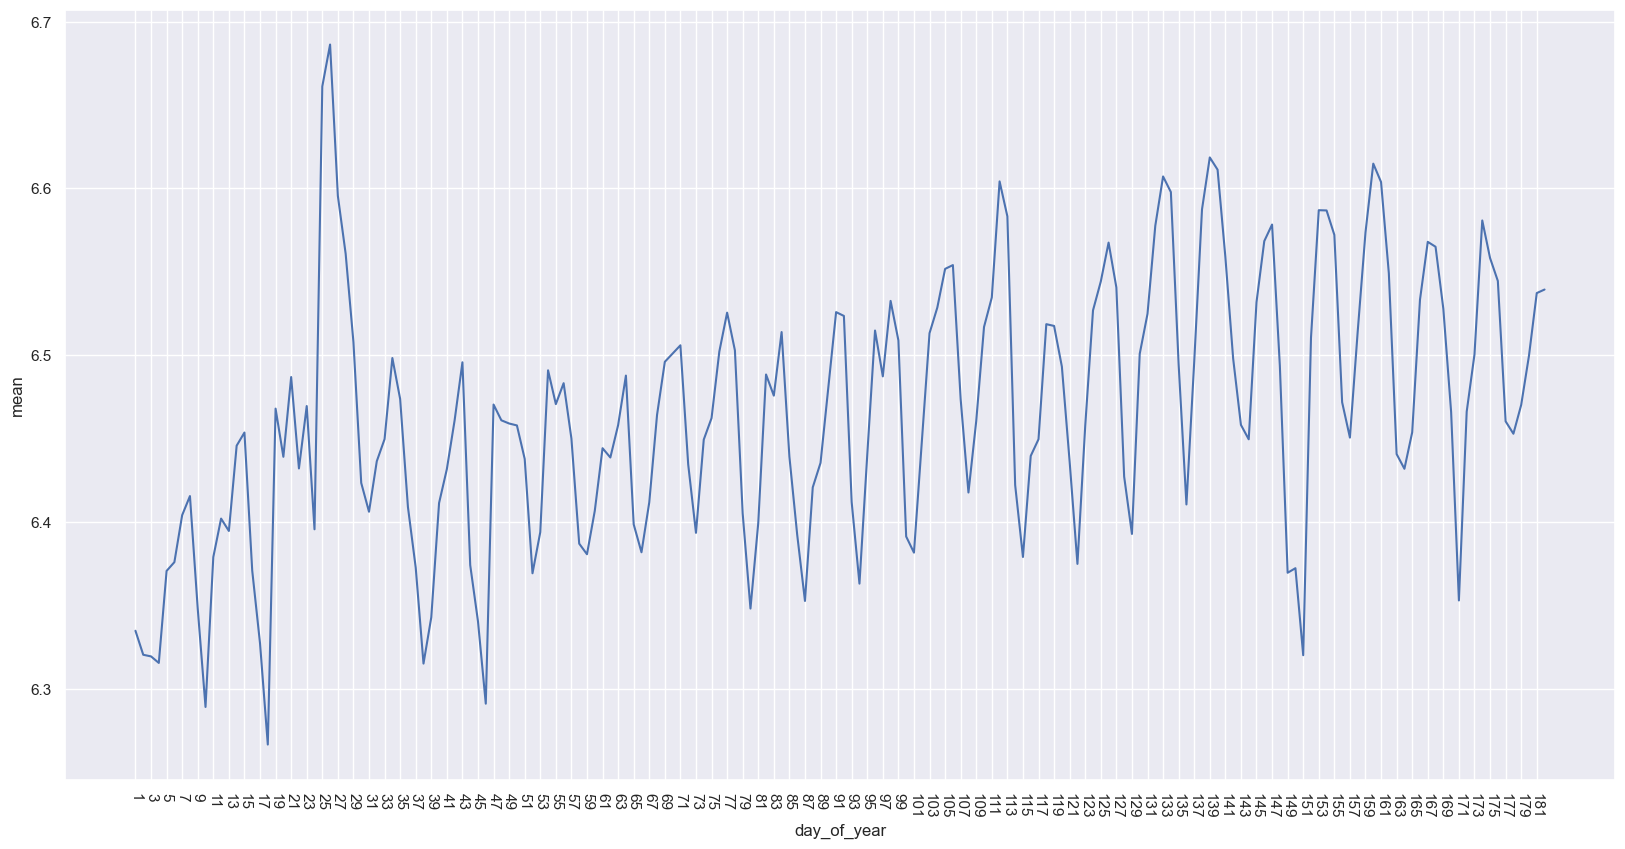

In [31]:
plt.figure(figsize = (20, 10))
plt.xticks(rotation= -90)
# Создаем массив значений для подписей 
xticks_values = np.arange(min(s_day_of_year.day_of_year), max(s_day_of_year.day_of_year) + 1, 2)

# Устанавливаем подписи
plt.xticks(xticks_values)
plt.plot(s_day_of_year.day_of_year, s_day_of_year.log_trip_duration)
plt.xlabel('day_of_year')
plt.ylabel('mean')

Text(0, 0.5, 'mean')

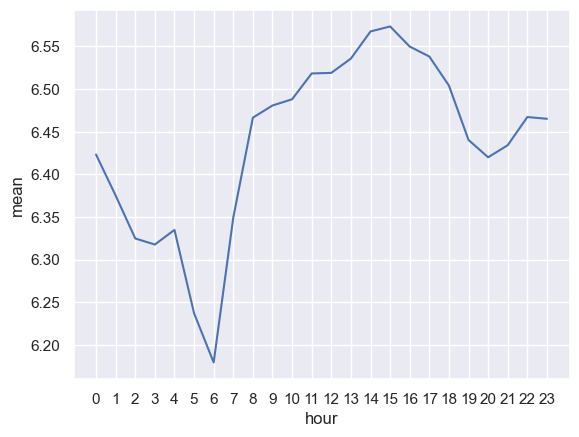

In [32]:
plt.plot(s_time.hour, s_time.log_trip_duration)
segmentation = np.arange(s_time.hour.min(), s_time.hour.max() + 1, 1)
plt.xticks(segmentation)
plt.xlabel('hour')
plt.ylabel('mean')

**Вопрос**: Похожи ли графики зависимости таргета от дня недели и от часа в сутках на аналогичные графики для количества поездок? Почему? Что происходит со средним таргетом в те два аномальных периода, что мы видели выше? Почему так происходит? Наблюдаете ли вы какой-нибудь тренд на графике зависимости `log_trip_duration` от номера дня в году?

Добавьте следующие признаки на основе `pickup_datetime`:
1. День недели
2. Месяц
3. Час
4. Является ли период аномальным (два бинарных признака, соответствующие двум аномальным периодам)
5. Номер дня в году

In [33]:
X_train['anomal'] = False
X_test['anomal'] = False

In [34]:
X_train.loc[\
    ((23 <= X_train['day_of_year']) & (X_train['day_of_year']<= 25)) |\
    ((150 <= X_train['day_of_year']) & (X_train['day_of_year'] <= 151)),\
    'anomal'] = True
X_test.loc[\
    ((23 <= X_test['day_of_year']) & (X_test['day_of_year']<= 25)) |\
    ((150 <= X_test['day_of_year']) & (X_test['day_of_year'] <= 151)),\
    'anomal'] = True

Итак, мы уже создали некоторое количество признаков.

**Вопрос**: Какие из признаков _стоит рассматривать в этой задаче_   как категориальные, а какие - как численные? Почему?

**Задание 5 (0.75 баллов)**. Обучите `Ridge`-регрессию с параметрами по умолчанию, закодировав все категориальные признаки с помощью `OneHotEncoder`. Численные признаки отмасштабируйте с помощью `StandardScaler`. Используйте только признаки, которые мы выделили в этой части задания.

In [35]:
X_train = X_train.drop(columns = ['id'])

In [36]:
X_test = X_test.drop(columns = ['id'])

In [37]:
all = ['day_of_year', 'day_of_week', 'hour', 'month', 'anomal']
catigorial = ['day_of_week', 'anomal']
numeric_features = ['day_of_year', 'hour', 'month']

In [38]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error


column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), catigorial),
    ('scaling', StandardScaler(), numeric_features)
])


In [39]:
column_transformer

ColumnTransformer(transformers=[('ohe', OneHotEncoder(handle_unknown='ignore'),
                                 ['day_of_week', 'anomal']),
                                ('scaling', StandardScaler(),
                                 ['day_of_year', 'hour', 'month'])])

In [41]:
pipeline

Pipeline(steps=[('ohe_and_scaling',
                 ColumnTransformer(transformers=[('ohe',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['day_of_week', 'anomal']),
                                                 ('scaling', StandardScaler(),
                                                  ['day_of_year', 'hour',
                                                   'month'])])),
                ('regression', Ridge())])

In [42]:
model = pipeline.fit(X_train[all], Y_train)

In [43]:
from sklearn.metrics import root_mean_squared_error
Y_pred_train = model.predict(X_train[all])
print("Train RMSE = %.4f" % root_mean_squared_error(Y_train, Y_pred_train))

Train RMSE = 0.7937


## Часть 2. Изучаем координаты (3 балла)
Мы уже очень хорошо изучили данные о времени начала поездки, давайте теперь посмотрим на информацию о координатах начала и конца поездки. Мы подготовили для вас функцию, которая на карте рисует точки начала или конца поездки. Примеры ее вызова вы найдете ниже. Обратите внимание, что в эту функцию мы передаем лишь небольшой кусочек данных, посколько иначе функция будет работать очень долго

In [44]:
def show_circles_on_map(data, latitude_column, longitude_column, color, m = None, location = None):
    """
    The function draws map with circles on it.
    The center of the map is the mean of coordinates passed in data.
    
    data: DataFrame that contains columns latitude_column and longitude_column
    latitude_column: string, the name of column for latitude coordinates
    longitude_column: string, the name of column for longitude coordinates
    color: string, the color of circles to be drawn
    """

    if m == None:
        location = (data[latitude_column].mean(), data[longitude_column].mean())
        m = folium.Map(location=location)

    for _, row in data.iterrows():
        folium.Circle(
            radius=100,
            location=(row[latitude_column], row[longitude_column]),
            color=color,
            fill_color=color,
            fill=True
        ).add_to(m)

    return m

In [45]:
show_circles_on_map(df.sample(1000), "pickup_latitude", "pickup_longitude", "blue")

In [46]:
show_circles_on_map(df.sample(1000), "dropoff_latitude", "dropoff_longitude", "blue")

**Вопрос**: Какие пункты (или скопления точек, в количестве 2-3), по вашему мнению, выделяются на карте от основной массы и могут быть полезны для нашей задачи? Почему вы их выбрали? В чём особенность этих скоплений точек для нашей задачи?

**Задание 6 (0.75 балл)**. Как мы все прекрасно помним, $t = s / v_{\text{ср}}$, поэтому очевидно, что самым сильным признаком будет расстояние, которое необходимо проехать. Мы не можем посчитать точное расстояние, которое необходимо преодолеть такси, но мы можем его оценить, посчитав кратчайшее расстояние между точками начала и конца поездки. Чтобы корректно посчитать расстояние между двумя точками на Земле, можно использовать функцию `haversine`. Также можно воспользоваться кодом с первого семинара. Посчитайте кратчайшее расстояние для объектов и запишите его в колонку `haversine`:

In [47]:
!pip install haversine
from haversine import haversine, Unit

In [48]:
df['anomal'] = False
df.loc[\
    ((23 <= df['day_of_year']) & (df['day_of_year']<= 25)) |\
    ((150 <= df['day_of_year']) & (df['day_of_year'] <= 151)),\
    'anomal'] = True

In [49]:
df

id  vendor_id     pickup_datetime     dropoff_datetime  \
0        id2875421          2 2016-03-14 17:24:55  2016-03-14 17:32:30   
1        id2377394          1 2016-06-12 00:43:35  2016-06-12 00:54:38   
2        id3858529          2 2016-01-19 11:35:24  2016-01-19 12:10:48   
3        id3504673          2 2016-04-06 19:32:31  2016-04-06 19:39:40   
4        id2181028          2 2016-03-26 13:30:55  2016-03-26 13:38:10   
...            ...        ...                 ...                  ...   
1458639  id2376096          2 2016-04-08 13:31:04  2016-04-08 13:44:02   
1458640  id1049543          1 2016-01-10 07:35:15  2016-01-10 07:46:10   
1458641  id2304944          2 2016-04-22 06:57:41  2016-04-22 07:10:25   
1458642  id2714485          1 2016-01-05 15:56:26  2016-01-05 16:02:39   
1458643  id1209952          1 2016-04-05 14:44:25  2016-04-05 14:47:43   

         passenger_count  pickup_longitude  pickup_latitude  \
0                      1        -73.982155        40.767937   
1                      1        -73.980415        40.738564   
2                      1        -73.979027        40.763939   
3                      1        -74.010040        40.719971   
4                      1        -73.973053        40.793209   
...                  ...               ...              ...   
1458639                4        -73.982201        40.745522   
1458640                1        -74.000946        40.747379   
1458641                1        -73.959129        40.768799   
1458642                1        -73.982079        40.749062   
1458643                1        -73.979538        40.781750   

         dropoff_longitude  dropoff_latitude store_and_fwd_flag  \
0               -73.964630         40.765602                  N   
1               -73.999481         40.731152                  N   
2               -74.005333         40.710087                  N   
3               -74.012268         40.706718                  N   
4               -73.972923         40.782520                  N   
...                    ...               ...                ...   
1458639         -73.994911         40.740170                  N   
1458640         -73.970184         40.796547                  N   
1458641         -74.004433         40.707371                  N   
1458642         -73.974632         40.757107                  N   
1458643         -73.972809         40.790585                  N   

         trip_duration  log_trip_duration  day_of_year  day_of_week  hour  \
0                  455           6.122493           74            0    17   
1                  663           6.498282          164            6     0   
2                 2124           7.661527           19            1    11   
3                  429           6.063785           97            2    19   
4                  435           6.077642           86            5    13   
...                ...                ...          ...          ...   ...   
1458639            778           6.658011           99            4    13   
1458640            655           6.486161           10            6     7   
1458641            764           6.639876          113            4     6   
1458642            373           5.924256            5            1    15   
1458643            198           5.293305           96            1    14   

         month  anomal  
0            3   False  
1            6   False  
2            1   False  
3            4   False  
4            3   False  
...        ...     ...  
1458639      4   False  
1458640      1   False  
1458641      4   False  
1458642      1   False  
1458643      4   False  

[1458644 rows x 17 columns]

In [50]:
def get_haversine(row):
    start = (row['pickup_latitude'], row['pickup_longitude'])
    finish = (row['dropoff_latitude'], row['dropoff_longitude'])
    return haversine(start, finish) + 0.000001	

In [51]:
df['haversine'] = df.apply(get_haversine, axis = 1)

Так как мы предсказываем логарифм времени поездки и хотим, чтобы наши признаки были линейно зависимы с этой целевой переменной, нам нужно логарифмировать расстояние: $\log t = \log s - \log{v_{\text{ср}}}$. Запишите логарифм `haversine` в отдельную колонку `log_haversine`:

In [52]:
df['log_haversine'] = np.log(df['haversine'])

Убедимся, что логарифм расстояния лучше коррелирует с нашим таргетом, чем просто расстояние:

In [53]:
your_df = df
assert your_df['log_haversine'].corr(your_df['log_trip_duration']) > your_df['haversine'].corr(your_df['log_trip_duration'])

**Задание 7 (0.75 балла)**. Давайте изучим среднюю скорость движения такси. Посчитайте среднюю скорость для каждого объекта обучающей выборки, разделив `haversine` на `trip_duration`, и нарисуйте гистограмму ее распределения

In [54]:
df['mean_speed'] = df['haversine'] / df['trip_duration']

Text(0, 0.5, 'frequency')

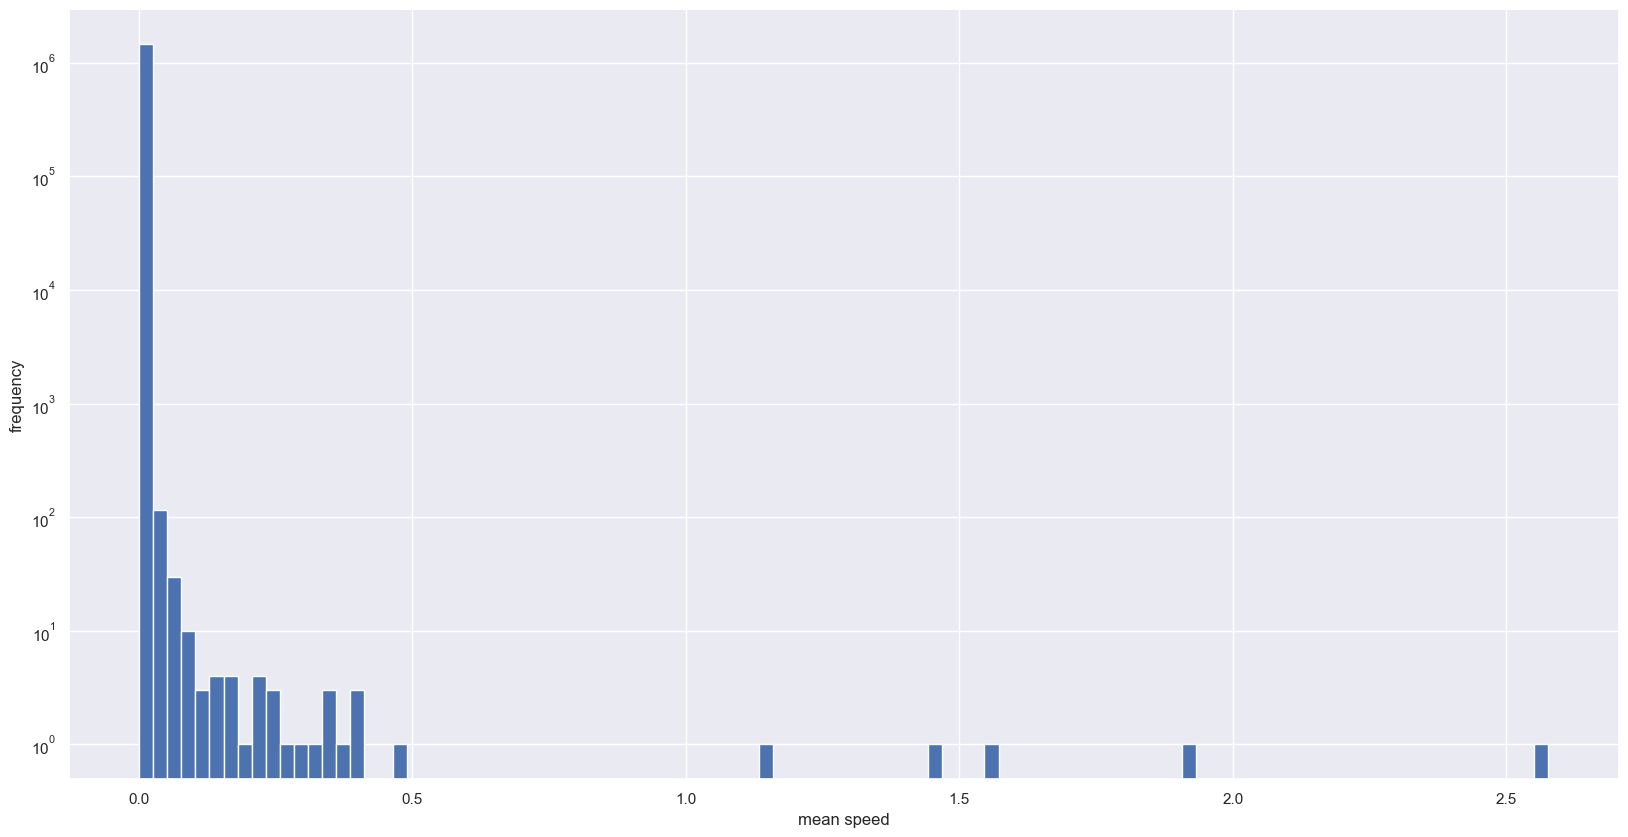

In [55]:
plt.figure(figsize = (20, 10))
plt.hist(df['mean_speed'], bins = 100, log = True)
plt.xlabel('mean speed')
plt.ylabel('frequency')

Как можно видеть по гистограмме, для некоторых объектов у нас получились очень больше значения скоростей. Нарисуйте гистограмму по объектам, для которых значение скорости получилось разумным (например, можно не включать рассмотрение объекты, где скорость больше некоторой квантили):

Text(0, 0.5, 'frequency')

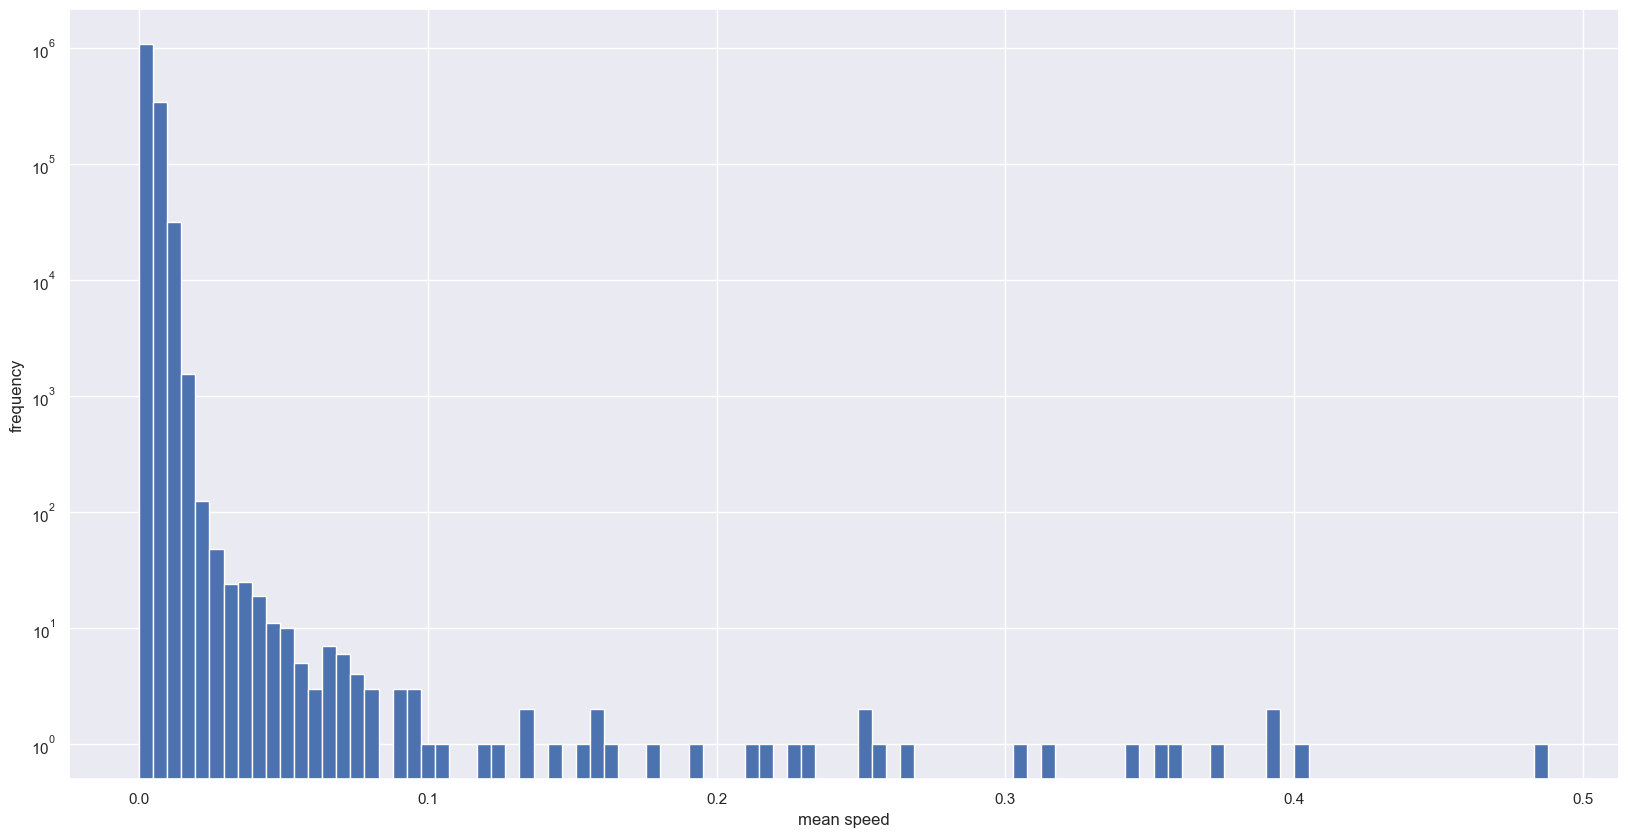

In [56]:
plt.figure(figsize = (20, 10))
plt.hist(df[df['mean_speed'] < 1]['mean_speed'], bins = 100, log = True)
plt.xlabel('mean speed')
plt.ylabel('frequency')

In [57]:
df.head(1)

id  vendor_id     pickup_datetime     dropoff_datetime  \
0  id2875421          2 2016-03-14 17:24:55  2016-03-14 17:32:30   

   passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  \
0                1        -73.982155        40.767937          -73.96463   

   dropoff_latitude store_and_fwd_flag  trip_duration  log_trip_duration  \
0         40.765602                  N            455           6.122493   

   day_of_year  day_of_week  hour  month  anomal  haversine  log_haversine  \
0           74            0    17      3   False   1.498524       0.404481   

   mean_speed  
0    0.003293

Для каждой пары (день недели, час суток) посчитайте медиану скоростей. Нарисуйте с помощью `sns.heatmap` график, где по осям будут дни недели и часы, а в качестве значения функции - медиана скорости

In [58]:
df_day_hour_speed = df.groupby(by = ['day_of_week', 'hour']).aggregate({'mean_speed' : 'median'}).reset_index()

<Axes: xlabel='day_of_week', ylabel='hour'>

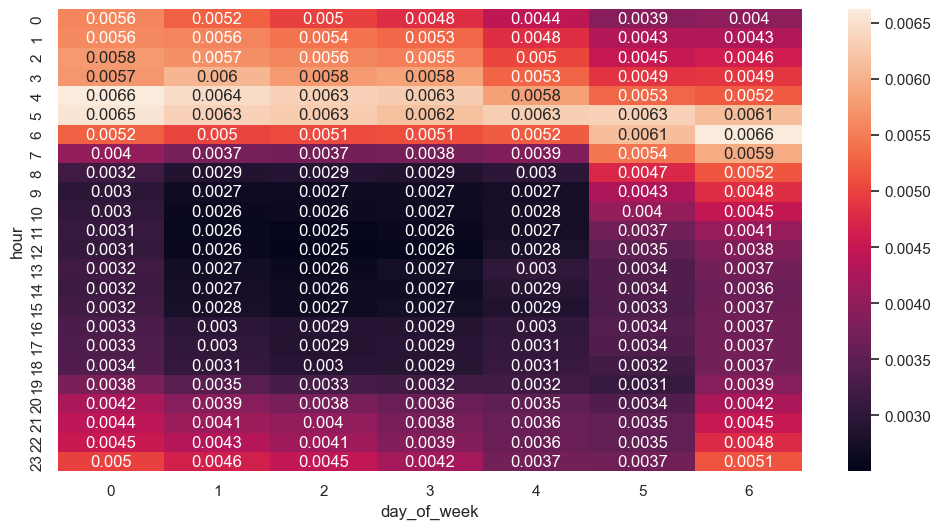

In [59]:
plt.figure(figsize=(12, 6))
glue = df_day_hour_speed.pivot(index="hour", columns="day_of_week", values="mean_speed")
sns.heatmap(glue, annot=True)

Не забудьте удалить колонку со значением скорости из данных!

**Вопрос**: Почему значение скорости нельзя использовать во время обучения?

In [60]:
df = df.drop(columns = 'mean_speed')

**Вопрос**: Посмотрите внимательно на график и скажите, в какие моменты времени скорость минимальна; максимальна.

Создайте признаки "поездка совершается в период пробок" и "поездка совершается в период свободных дорог" (естественно, они не должен зависеть от скорости!):

In [61]:
day_hour_amount = df.groupby(by = ['day_of_week', 'hour']).aggregate({'day_of_year' : 'count'}).reset_index().\
    rename(columns = {'day_of_year' : 'count'})

In [62]:
day_hour_amount

day_of_week  hour  count
0              0     0   4299
1              0     1   2578
2              0     2   1658
3              0     3   1226
4              0     4   1351
..           ...   ...    ...
163            6    19  10046
164            6    20   9136
165            6    21   8737
166            6    22   7892
167            6    23   6367

[168 rows x 3 columns]

In [63]:
day_hour_amount['perc'] = 1 - day_hour_amount['count'].rank() / day_hour_amount.shape[0]

In [64]:
day_hour_amount['probki'] = day_hour_amount['perc'] < 0.2

<Axes: xlabel='day_of_week', ylabel='hour'>

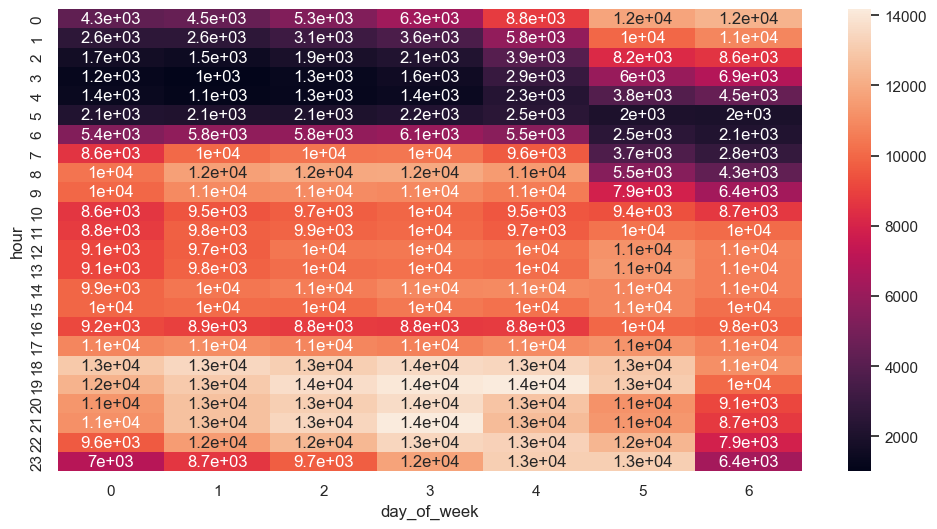

In [65]:
plt.figure(figsize=(12, 6))
glue = day_hour_amount.pivot(index="hour", columns="day_of_week", values="count")
sns.heatmap(glue, annot=True)

<Axes: xlabel='day_of_week', ylabel='hour'>

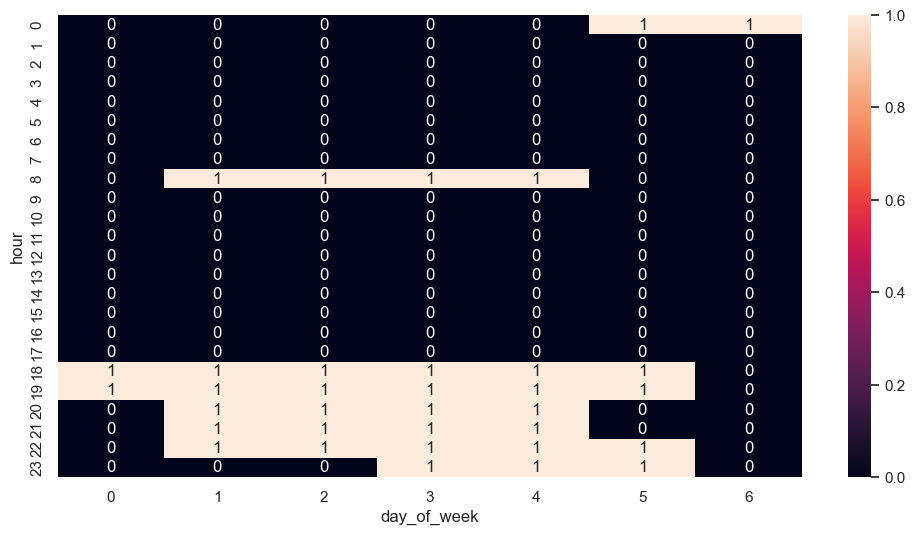

In [66]:
plt.figure(figsize=(12, 6))
glue = day_hour_amount.pivot(index="hour", columns="day_of_week", values="probki")
sns.heatmap(glue, annot=True)

In [67]:
df['probki'] = False

In [68]:
day_hour_amount[(day_hour_amount['day_of_week'] == 4) & (day_hour_amount['hour'] == 0)]['probki'].values[0]

False

In [69]:
def mark_probki(row):
    return day_hour_amount[(day_hour_amount['day_of_week'] == row['day_of_week']) & (day_hour_amount['day_of_week'] == row['day_of_week'])]['probki'].values[0]

In [70]:
df['probki'] = df.apply(mark_probki, axis = 1)

**Задание 8 (0.25 балла)**. Для каждого из замеченных вами выше 2-3 пунктов добавьте в выборку по два признака: 
- началась ли поездка в этом пункте
- закончилась ли поездка в этом пункте

Как вы думаете, почему эти признаки могут быть полезны?

In [71]:
def start_in_air(row, kind):
    if (kind == 'start'):
        now = (row['pickup_latitude'], row['pickup_longitude'])
    else:
        now = (row['dropoff_latitude'], row['dropoff_longitude'])
    if (haversine(now, kenadi_airport) < 1) or (haversine(now, la_guard_airport) < 1) :
        return True
    else:
        return False

In [72]:
kenadi_airport = (40.656169, -73.798716)
la_guard_airport = (40.770251, -73.873436)
df['start_in_airport'] = df.apply(lambda x: start_in_air(x, 'start'), axis = 1)
df['finish_in_airport'] = df.apply(lambda x: start_in_air(x, 'finish'), axis = 1)

In [73]:
show_circles_on_map(df[df['finish_in_airport']].sample(1000), "dropoff_latitude", "dropoff_longitude", "blue")

Для каждого из созданных признаков нарисуйте "ящик с усами" (`sns.boxplot`) распределения логарифма времени поездки

<Axes: xlabel='start_in_airport', ylabel='log_trip_duration'>

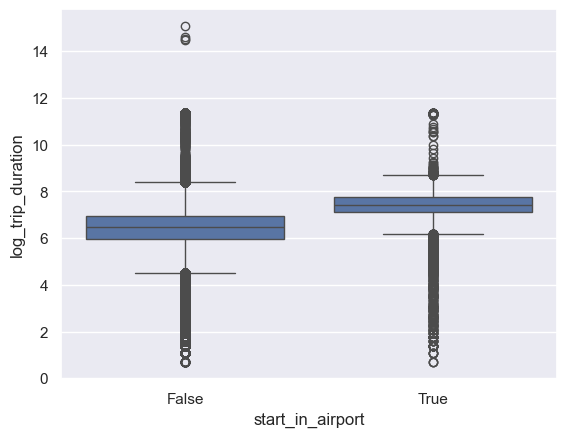

In [74]:
sns.boxplot(x="start_in_airport", y="log_trip_duration", data=df)

<Axes: xlabel='finish_in_airport', ylabel='log_trip_duration'>

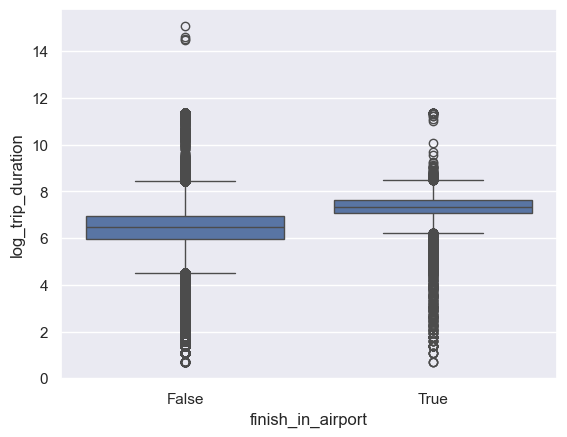

In [75]:
sns.boxplot(x="finish_in_airport", y="log_trip_duration", data=df)

**Вопрос**: судя по графикам, как вы думаете, хорошими ли получились эти признаки?

<img src="https://www.dropbox.com/s/xson9nukz5hba7c/map.png?raw=1" align="right" width="20%" style="margin-left: 20px; margin-bottom: 20px">

**Задание 9 (1 балл)**. Сейчас мы почти что не используем сами значения координат. На это есть несколько причин: по отдельности рассматривать широту и долготу не имеет особого смысла, стоит рассматривать их вместе. Во-вторых, понятно, что зависимость между нашим таргетом и координатами не линейная. Чтобы как-то использовать координаты, можно прибегнуть к следующему трюку: обрамим область с наибольшим количеством поездок прямоугольником (как на рисунке). Разобьем этот прямоугольник на ячейки. Каждой точке сопоставим номер ее ячейки, а тем точкам, что не попали ни в одну из ячеек, сопоставим значение -1.

Напишите трансформер, который сначала разбивает показанную на рисунке область на ячейки, а затем создает два признака: номер ячейки, в которой началась поездка, и номер ячейки, в которой закончилась поездка. Количество строк и столбцов выберите самостоятельно.

Обратите внимание, что все вычисления должны быть векторизованными, трансформер не должен модифицировать передаваемую ему выборку inplace, а все необходимые статистики (если они вдруг нужны) нужно считать только по обучающей выборке в методе `fit`:

In [76]:
 def show_line(m, point1, point2):
    folium.PolyLine(
    locations=[point1, point2],
    color="#FF0000"
    # weight=5,
    # tooltip="From Boston to San Francisco",
    ).add_to(m)

def show_lines(m, count, start_1, start_2, step):
    for _ in range(count):
        show_line(m, start_1, start_2)
        start_1 = tuple(np.add(start_1, step))
        start_2 = tuple(np.add(start_2, step))

In [77]:
df.dtypes

id                            object
vendor_id                      int64
pickup_datetime       datetime64[ns]
dropoff_datetime              object
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag            object
trip_duration                  int64
log_trip_duration            float64
day_of_year                    int64
day_of_week                    int64
hour                           int64
month                          int64
anomal                          bool
haversine                    float64
log_haversine                float64
probki                          bool
start_in_airport                bool
finish_in_airport               bool
dtype: object

In [78]:
from sklearn.base import BaseEstimator, TransformerMixin


# TransformerMixin implements fit_transform for you,
# applying your fit and transform consistently
    
class MapGridTransformer(BaseEstimator, TransformerMixin): 
    def __init__(self, data, latitude_column, longitude_column, high, low, left, right, row_count, columns_count):
        self.data = data
        self.latitude_column = latitude_column
        self.longitude_column = longitude_column
        self.high = high
        self.low = low
        self.left = left
        self.right = right
        self.row_count = row_count
        self.columns_count = columns_count
        self.row_step = (self.high - self.low) / self.row_count
        self.column_step = (self.right - self.left) / self.columns_count
        pass            
    
    def show_map(self, m):
        show_lines(m, self.row_count + 1, (self.low, self.left), (self.low, self.right), (self.row_step, 0))
        show_lines(m, self.columns_count + 1, (self.low, self.left), (self.high, self.left), (0, self.column_step))
        return m
    
    def fit(self, X=None, y=None):
        
        return self

    def transform(self, X, y=None):
        X['out_of_sector_pickup'] = (X['pickup_latitude'] > self.high) | \
                                    (X['pickup_latitude'] < self.low)  | \
                                    (X['pickup_longitude'] < self.left) | \
                                    (X['pickup_longitude'] > self.right)
        X['pickup_sector'] = ((X['pickup_latitude'] - self.low) / self.row_step).astype(int) * self.columns_count + \
                             ((X['pickup_longitude'] - self.left) / self.column_step).astype(int)
        X['out_of_sector_dropoff'] = (X['dropoff_latitude'] > self.high) | \
                                     (X['dropoff_latitude'] < self.low) | \
                                     (X['dropoff_longitude'] < self.left) | \
                                     (X['dropoff_longitude'] > self.right)
        X['dropoff_sector'] = ((X['dropoff_latitude'] - self.low) / self.row_step).astype(int) * self.columns_count + \
                              ((X['dropoff_longitude'] - self.left) / self.column_step).astype(int)
        X.loc[X['out_of_sector_pickup'], 'pickup_sector'] = -1
        X.loc[X['out_of_sector_dropoff'], 'dropoff_sector'] = -1
        return X #.drop(columns = ['pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude'])

In [79]:
df

id  vendor_id     pickup_datetime     dropoff_datetime  \
0        id2875421          2 2016-03-14 17:24:55  2016-03-14 17:32:30   
1        id2377394          1 2016-06-12 00:43:35  2016-06-12 00:54:38   
2        id3858529          2 2016-01-19 11:35:24  2016-01-19 12:10:48   
3        id3504673          2 2016-04-06 19:32:31  2016-04-06 19:39:40   
4        id2181028          2 2016-03-26 13:30:55  2016-03-26 13:38:10   
...            ...        ...                 ...                  ...   
1458639  id2376096          2 2016-04-08 13:31:04  2016-04-08 13:44:02   
1458640  id1049543          1 2016-01-10 07:35:15  2016-01-10 07:46:10   
1458641  id2304944          2 2016-04-22 06:57:41  2016-04-22 07:10:25   
1458642  id2714485          1 2016-01-05 15:56:26  2016-01-05 16:02:39   
1458643  id1209952          1 2016-04-05 14:44:25  2016-04-05 14:47:43   

         passenger_count  pickup_longitude  pickup_latitude  \
0                      1        -73.982155        40.767937   
1                      1        -73.980415        40.738564   
2                      1        -73.979027        40.763939   
3                      1        -74.010040        40.719971   
4                      1        -73.973053        40.793209   
...                  ...               ...              ...   
1458639                4        -73.982201        40.745522   
1458640                1        -74.000946        40.747379   
1458641                1        -73.959129        40.768799   
1458642                1        -73.982079        40.749062   
1458643                1        -73.979538        40.781750   

         dropoff_longitude  dropoff_latitude store_and_fwd_flag  ...  \
0               -73.964630         40.765602                  N  ...   
1               -73.999481         40.731152                  N  ...   
2               -74.005333         40.710087                  N  ...   
3               -74.012268         40.706718                  N  ...   
4               -73.972923         40.782520                  N  ...   
...                    ...               ...                ...  ...   
1458639         -73.994911         40.740170                  N  ...   
1458640         -73.970184         40.796547                  N  ...   
1458641         -74.004433         40.707371                  N  ...   
1458642         -73.974632         40.757107                  N  ...   
1458643         -73.972809         40.790585                  N  ...   

         day_of_year  day_of_week  hour  month  anomal  haversine  \
0                 74            0    17      3   False   1.498524   
1                164            6     0      6   False   1.805511   
2                 19            1    11      1   False   6.385108   
3                 97            2    19      4   False   1.485501   
4                 86            5    13      3   False   1.188591   
...              ...          ...   ...    ...     ...        ...   
1458639           99            4    13      4   False   1.225083   
1458640           10            6     7      1   False   6.049845   
1458641          113            4     6      4   False   7.824618   
1458642            5            1    15      1   False   1.092566   
1458643           96            1    14      4   False   1.134045   

         log_haversine  probki  start_in_airport  finish_in_airport  
0             0.404481   False             False              False  
1             0.590843    True             False              False  
2             1.853968   False             False              False  
3             0.395752   False             False              False  
4             0.172769    True             False              False  
...                ...     ...               ...                ...  
1458639       0.203008   False             False              False  
1458640       1.800033    True             False              False  
1458641       2.057275   False             Fal

In [80]:
colors = ['#800000',
          '#A52A2A',
          '#A0522D',
          '#8B4513',
          '#D2691E',
          '#CD853F',
          '#B8860B',
          '#DAA520',
          '#F4A460',
          '#BC8F8F',
          '#D2B48C',
          '#DEB887',
          '#F5DEB3',
          '#FFDEAD',
          '#FFE4C4',
          '#FFEBCD',
          '#FFF8DC',
          '#E6E6FA', 
          '#D8BFD8',	
          '#DDA0DD', 
          '#EE82EE', 
          '#DA70D6', 
          '#FF00FF', 
          '#FF00FF', 
          '#BA55D3', 
          '#9370DB', 
          '#8A2BE2', 
          '#9400D3', 
          '#9932CC', 
          '#8B008B', 
          '#800080', 
          '#4B0082', 
          '#6A5ACD', 
          '#483D8B']


In [81]:
len(colors)

34

In [82]:
myMapGridTransformer = MapGridTransformer(df, "pickup_latitude", "pickup_longitude", 40.786125, 40.701707, -74.018398, -73.942486, 5, 3)
# myMapGridTransformer.show_map()
dff = myMapGridTransformer.transform(df.sample(1000))
# dff
location = (df["pickup_latitude"].mean(), df["pickup_longitude"].mean())
m = folium.Map(location=location)
for i in range(30):
    if dff[dff['pickup_sector'] == i].shape[0] != 0:
        show_circles_on_map(dff[dff['pickup_sector'] == i], "pickup_latitude", "pickup_longitude", colors[i], m, location)
myMapGridTransformer.show_map(m)
m

**Задание 10 (0.25 балла)**. Обучите `Ridge`-регрессию со стандартными параметрами на признаках, которые мы выделили к текущему моменту. Категориальные признаки закодируйте через one-hot-кодирование, числовые признаки отмасштабируйте.

In [83]:
df.dtypes

id                            object
vendor_id                      int64
pickup_datetime       datetime64[ns]
dropoff_datetime              object
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag            object
trip_duration                  int64
log_trip_duration            float64
day_of_year                    int64
day_of_week                    int64
hour                           int64
month                          int64
anomal                          bool
haversine                    float64
log_haversine                float64
probki                          bool
start_in_airport                bool
finish_in_airport               bool
dtype: object

In [84]:
Y = df['log_trip_duration']
X = df.drop(columns = ['log_trip_duration', 'id'])
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3)

In [85]:
from sklearn.pipeline import make_pipeline
from sklearn.metrics import root_mean_squared_error
categorical = ['anomal', 'month', 'day_of_week', 'probki', 'start_in_airport', 'finish_in_airport'] 
numeric_features = ['day_of_year', 'hour']

# Создаем ColumnTransformer
column_transformer = ColumnTransformer([
    ('grid_and_ohe', 
     make_pipeline(
         MapGridTransformer(data=df, 
                             latitude_column="pickup_latitude", 
                             longitude_column="pickup_longitude", 
                             high=40.786125, 
                             low=40.701707, 
                             left=-74.018398, 
                             right=-73.942486, 
                             row_count=7, 
                             columns_count=4),
         OneHotEncoder(handle_unknown='ignore')
     ),
     ['pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude'] + categorical
    ),
    ('scaling', StandardScaler(), numeric_features)
])

# Создаем Pipeline
pipeline = Pipeline(steps=[
    ('grid_and_preprocessing', column_transformer),
    ('regression', Ridge())
])

# Обучаем модель
model = pipeline.fit(X_train, Y_train)

# # Делаем предсказания
y_pred = model.predict(X_test)

# # Оцениваем модель
print("Test RMSE = %.4f" % root_mean_squared_error(Y_test, y_pred))

Test RMSE = 0.7563


In [86]:
column_transformer

ColumnTransformer(transformers=[('grid_and_ohe',
                                 Pipeline(steps=[('mapgridtransformer',
                                                  MapGridTransformer(columns_count=4,
                                                                     data=                id  vendor_id     pickup_datetime     dropoff_datetime  \
0        id2875421          2 2016-03-14 17:24:55  2016-03-14 17:32:30   
1        id2377394          1 2016-06-12 00:43:35  2016-06-12 00:54:38   
2        id3858529          2 2016-01-19 11:35:24  2016-01-19 12:10:48   
3        id3504673          2 2016-04-06 19:32:31  2016-04-06 1...
                                                                     longitude_column='pickup_longitude',
                                                                     low=40.701707,
                                                                     right=-73.942486,
                                                                     row_count=7)),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['pickup_latitude', 'pickup_longitude',
                                  'dropoff_latitude', 'dropoff_longitude',
                                  'anomal', 'month', 'day_of_week', 'probki',
                                  'start_in_airport', 'finish_in_airport']),
                                ('scaling', StandardScaler(),
                                 ['day_of_year', 'hour'])])

In [87]:
pipeline

Pipeline(steps=[('grid_and_preprocessing',
                 ColumnTransformer(transformers=[('grid_and_ohe',
                                                  Pipeline(steps=[('mapgridtransformer',
                                                                   MapGridTransformer(columns_count=4,
                                                                                      data=                id  vendor_id     pickup_datetime     dropoff_datetime  \
0        id2875421          2 2016-03-14 17:24:55  2016-03-14 17:32:30   
1        id2377394          1 2016-06-12 00:43:35  2016-06-12 00:54:38   
2        id3858529          2 2016-01-19 11:35:24  2016-01-19 12:10:...
                                                                                      longitude_column='pickup_longitude',
                                                                                      low=40.701707,
                                                                                      right=-73.942486,
                                                                                      row_count=7)),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['pickup_latitude',
                                                   'pickup_longitude',
                                                   'dropoff_latitude',
                                                   'dropoff_longitude',
                                                   'anomal', 'month',
                                                   'day_of_week', 'probki',
                                                   'start_in_airport',
                                                   'finish_in_airport']),
                                                 ('scaling', StandardScaler(),
                                                  ['day_of_year', 'hour'])])),
                ('regression', Ridge())])

In [88]:

model_weights = model.named_steps['regression'].coef_


In [89]:
df = myMapGridTransformer.transform(df)

## Часть 3. Изучаем оставшиеся признаки (1 балл)

**Задание 11 (0.75 баллов)**. У нас осталось еще 3 признака, которые мы не исследовали: `vendor_id`, `passenger_count` и `store_and_fwd_flag`.

**Вопрос**: Подумайте, почему каждый из этих признаков может быть потенциально полезным.

Посчитайте, сколько есть уникальных значений у каждого из этих признаков:

In [90]:
len(df['vendor_id'].unique()), df['vendor_id'].unique()

(2, array([2, 1], dtype=int64))

In [91]:
len(df['passenger_count'].unique()), df['passenger_count'].unique()

(10, array([1, 6, 4, 2, 3, 5, 0, 7, 9, 8], dtype=int64))

In [92]:
len(df['store_and_fwd_flag'].unique()), df['store_and_fwd_flag'].unique()

(2, array(['N', 'Y'], dtype=object))

Постройте "ящики с усами" распределений логарифма времени поездки в зависимости от значений каждого из признаков

In [93]:
# df1 = df.groupby('vendor_id').aggregate({'log_trip_duration' : 'mean'}).reset_index().rename(columns = {'log_trip_duration' : 'mean_log_trip_duration'})

<Axes: xlabel='vendor_id', ylabel='log_trip_duration'>

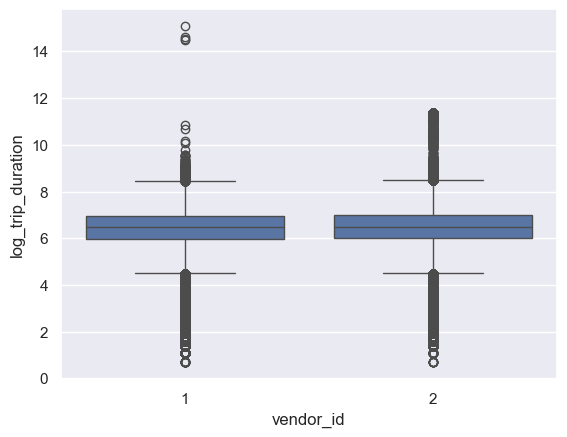

In [94]:
sns.boxplot(x="vendor_id", y="log_trip_duration", data=df)

<Axes: xlabel='passenger_count', ylabel='log_trip_duration'>

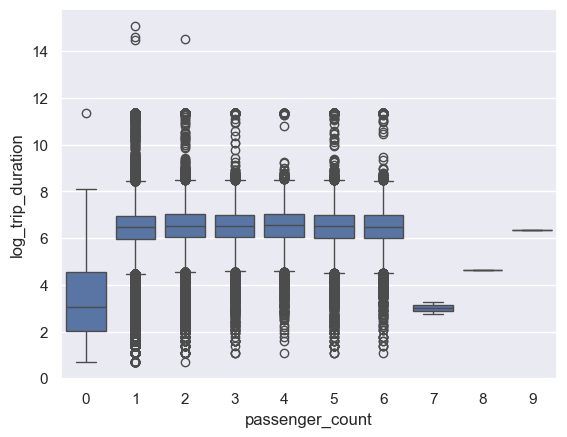

In [95]:
sns.boxplot(x="passenger_count", y="log_trip_duration", data=df)

<Axes: xlabel='store_and_fwd_flag', ylabel='log_trip_duration'>

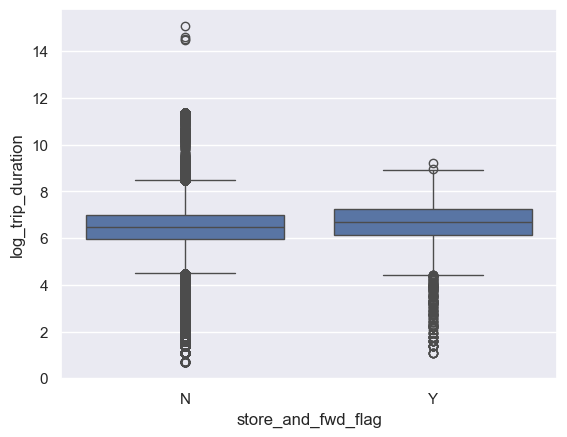

In [96]:
sns.boxplot(x="store_and_fwd_flag", y="log_trip_duration", data=df)

Переведите признаки `vendor_id` и `store_and_fwd_flag` в значения $\{0;1\}$

In [97]:
df['vendor_id'] -=1

In [98]:
df.loc[df['store_and_fwd_flag'] == 'N', 'store_and_fwd_flag'] = 0
df.loc[df['store_and_fwd_flag'] == 'Y', 'store_and_fwd_flag'] = 1

In [99]:
df['vendor_id'].unique(), df['store_and_fwd_flag'].unique()

(array([1, 0], dtype=int64), array([0, 1], dtype=object))

**Вопрос**: Основываясь на графиках выше, как вы думаете, будут ли эти признаки сильными?

**Задание 12 (0.25 баллов)**. Проверьте свои предположения, обучив модель в том числе и на этих трех признаках. Обучайте `Ridge`-регрессию со стандартными параметрами. Категориальные признаки закодируйте one-hot-кодированием, а численные отмасштабируйте.

Без новых:

In [100]:
df.dtypes

id                               object
vendor_id                         int64
pickup_datetime          datetime64[ns]
dropoff_datetime                 object
passenger_count                   int64
pickup_longitude                float64
pickup_latitude                 float64
dropoff_longitude               float64
dropoff_latitude                float64
store_and_fwd_flag               object
trip_duration                     int64
log_trip_duration               float64
day_of_year                       int64
day_of_week                       int64
hour                              int64
month                             int64
anomal                             bool
haversine                       float64
log_haversine                   float64
probki                             bool
start_in_airport                   bool
finish_in_airport                  bool
out_of_sector_pickup               bool
pickup_sector                     int32
out_of_sector_dropoff              bool


In [101]:
categorical = ['anomal', 'month', 'day_of_week', 'probki', 'start_in_airport', 'finish_in_airport', 'pickup_sector', 'dropoff_sector'] 
numeric_features = ['day_of_year', 'hour']

In [102]:
Y = df['log_trip_duration']
X = df.drop(columns = ['log_trip_duration', 'id'])
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3)

In [103]:
column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric_features)
])

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])

model = pipeline.fit(X_train, Y_train)
y_pred = model.predict(X_test)
print("Test RMSE = %.4f" % mean_squared_error(Y_test, y_pred, squared=False))

Test RMSE = 0.7549


C:\Users\annam\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [104]:
weights = model.named_steps['regression'].coef_

In [105]:
column_transformer.get_feature_names_out()

array(['ohe__anomal_False', 'ohe__anomal_True', 'ohe__month_1',
       'ohe__month_2', 'ohe__month_3', 'ohe__month_4', 'ohe__month_5',
       'ohe__month_6', 'ohe__day_of_week_0', 'ohe__day_of_week_1',
       'ohe__day_of_week_2', 'ohe__day_of_week_3', 'ohe__day_of_week_4',
       'ohe__day_of_week_5', 'ohe__day_of_week_6', 'ohe__probki_False',
       'ohe__probki_True', 'ohe__start_in_airport_False',
       'ohe__start_in_airport_True', 'ohe__finish_in_airport_False',
       'ohe__finish_in_airport_True', 'ohe__pickup_sector_-1',
       'ohe__pickup_sector_0', 'ohe__pickup_sector_1',
       'ohe__pickup_sector_2', 'ohe__pickup_sector_3',
       'ohe__pickup_sector_4', 'ohe__pickup_sector_5',
       'ohe__pickup_sector_6', 'ohe__pickup_sector_7',
       'ohe__pickup_sector_8', 'ohe__pickup_sector_9',
       'ohe__pickup_sector_10', 'ohe__pickup_sector_11',
       'ohe__pickup_sector_12', 'ohe__pickup_sector_13',
       'ohe__pickup_sector_14', 'ohe__dropoff_sector_-1',
       'ohe__dro

In [106]:
categorical2 = ['anomal', 'month', 'day_of_week', 'probki', 'start_in_airport', 'finish_in_airport', 'pickup_sector', 'dropoff_sector', 'vendor_id', 'store_and_fwd_flag'] 
numeric_features = ['day_of_year', 'hour']

In [107]:
column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical2),
    ('scaling', StandardScaler(), numeric_features)
])

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])

model = pipeline.fit(X_train, Y_train)
y_pred = model.predict(X_test)
print("Test RMSE = %.4f" % mean_squared_error(Y_test, y_pred, squared=False))

Test RMSE = 0.7547


C:\Users\annam\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [108]:
column_transformer.get_feature_names_out()

array(['ohe__anomal_False', 'ohe__anomal_True', 'ohe__month_1',
       'ohe__month_2', 'ohe__month_3', 'ohe__month_4', 'ohe__month_5',
       'ohe__month_6', 'ohe__day_of_week_0', 'ohe__day_of_week_1',
       'ohe__day_of_week_2', 'ohe__day_of_week_3', 'ohe__day_of_week_4',
       'ohe__day_of_week_5', 'ohe__day_of_week_6', 'ohe__probki_False',
       'ohe__probki_True', 'ohe__start_in_airport_False',
       'ohe__start_in_airport_True', 'ohe__finish_in_airport_False',
       'ohe__finish_in_airport_True', 'ohe__pickup_sector_-1',
       'ohe__pickup_sector_0', 'ohe__pickup_sector_1',
       'ohe__pickup_sector_2', 'ohe__pickup_sector_3',
       'ohe__pickup_sector_4', 'ohe__pickup_sector_5',
       'ohe__pickup_sector_6', 'ohe__pickup_sector_7',
       'ohe__pickup_sector_8', 'ohe__pickup_sector_9',
       'ohe__pickup_sector_10', 'ohe__pickup_sector_11',
       'ohe__pickup_sector_12', 'ohe__pickup_sector_13',
       'ohe__pickup_sector_14', 'ohe__dropoff_sector_-1',
       'ohe__dro

Если признаки не дали какого-то ощутимого улучшения метрики, их можно выбросить из данных.

## Часть 4. Улучшаем модель (3 балла)

**Задание 13 (1 балл)**. В наших данных есть нетипичные объекты (выбросы, или outliers): с аномально маленьким времени поездки, с очень большим пройденным расстоянием или очень большими остатками регрессии. В этом задании предлагается исключить такие объекты из обучающей выборки. Для этого нарисуйте гистограммы распределения упомянутых выше величин, выберите объекты, которые можно назвать выбросами, и очистите __обучающую выборку__ от них.

Отметим, что хотя эти объекты и выглядят как выбросы, в тестовой выборке тоже скорее всего будут объекты с такими же странными значениями целевой переменной и/или признаков. Поэтому, возможно, чистка обучающей выборки приведёт к ухудшению качества на тесте. Тем не менее, всё равно лучше удалять выбросы из обучения, чтобы модель получалась более разумной и интерпретируемой.

In [109]:
def del_outliers(df, column):
    MKP = df[column].quantile(0.75) - df[column].quantile(0.25)
    lower_bound = df[column].quantile(0.25) - 1.5 * MKP
    upper_bound = df[column].quantile(0.75) + 1.5 * MKP
    return df[(df[column] > lower_bound ) & (df[column] < upper_bound)]

In [110]:
train_df = pd.concat([X_train, Y_train], axis=1)

In [111]:
X_train.shape, len(y_pred)
Y_pred_train = model.predict(X_train)

In [112]:
train_df['regr_ost'] = (train_df['log_trip_duration'] - Y_pred_train)**2

In [113]:
train_df = del_outliers(train_df, "regr_ost")

In [114]:
train_df = del_outliers(train_df, "log_trip_duration")

In [115]:
train_df = del_outliers(train_df, "haversine")

<Axes: ylabel='haversine'>

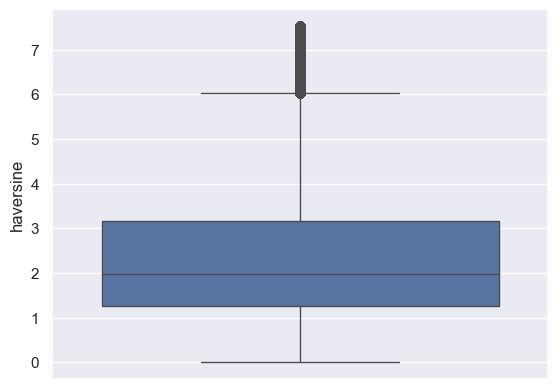

In [116]:
sns.boxplot(train_df["haversine"] )

Сейчас у нас очень много категориальных признаков. В категориальных признаках могут содержаться редкие категории, обычно это плохо: модель сильно переобучается на таких примерах. Для каждого категориального признака объедините действительно редкие категории в одну, если такие имеются (т.е. если категории действительно редкие). 

In [117]:
train_df.groupby('pickup_sector').aggregate({'anomal' : 'count'}).reset_index().sort_values('anomal')

pickup_sector  anomal
13             12     208
9               8     821
6               5    1099
3               2    3061
2               1    3831
10              9   18141
1               0   36031
14             13   51406
12             11   52701
5               4   63154
4               3   67129
0              -1   69333
7               6   76549
15             14   85407
8               7  141325
11             10  180814

In [118]:
train_df.loc[(train_df['pickup_sector'].isin([12, 8, 5, 2, 1])), 'pickup_sector'] = 2

In [119]:
train_df.groupby('dropoff_sector').aggregate({'anomal' : 'count'}).reset_index().sort_values('anomal')

dropoff_sector  anomal
13              12     524
9                8    2552
6                5    3845
2                1    6344
3                2    6379
10               9   23052
1                0   37957
12              11   50367
14              13   51851
5                4   55529
4                3   58734
7                6   63000
15              14   86488
0               -1  105573
8                7  133939
11              10  164876

In [120]:
train_df.loc[(train_df['dropoff_sector'].isin([12, 8, 5, 2, 1])), 'dropoff_sector'] = 2

In [121]:
train_df

vendor_id     pickup_datetime     dropoff_datetime  passenger_count  \
1303755          0 2016-03-01 18:19:44  2016-03-01 18:25:24                1   
390481           0 2016-03-28 14:47:21  2016-03-28 14:52:25                1   
391612           0 2016-05-22 18:29:01  2016-05-22 18:39:38                1   
246479           1 2016-04-15 20:00:07  2016-04-15 20:13:39                1   
117020           0 2016-03-10 10:17:29  2016-03-10 10:42:41                1   
...            ...                 ...                  ...              ...   
1347375          1 2016-04-26 13:49:47  2016-04-26 14:11:10                5   
556700           1 2016-02-24 09:36:47  2016-02-24 09:56:51                1   
510297           1 2016-05-20 04:15:22  2016-05-20 04:24:17                5   
1283980          1 2016-02-06 03:05:23  2016-02-06 03:28:40                1   
468979           1 2016-05-31 22:46:52  2016-05-31 22:50:58                1   

         pickup_longitude  pickup_latitude  dropoff_longitude  \
1303755        -73.971237        40.750233         -73.982162   
390481         -73.976547        40.780556         -73.971771   
391612         -73.969765        40.797005         -73.952316   
246479         -73.997078        40.724010         -73.999519   
117020         -74.003494        40.731976         -73.971657   
...                   ...              ...                ...   
1347375        -74.014473        40.703514         -73.989487   
556700         -73.978439        40.748131         -74.013763   
510297         -73.959518        40.814121         -73.959389   
1283980        -74.008583        40.740570         -73.954002   
468979         -73.980980        40.767879         -73.980011   

         dropoff_latitude store_and_fwd_flag  trip_duration  ...  \
1303755         40.736073                  0            340  ...   
390481          40.792042                  0            304  ...   
391612          40.779537                  0            637  ...   
246479          40.741711                  0            812  ...   
117020          40.750851                  0           1512  ...   
...                   ...                ...            ...  ...   
1347375         40.729435                  0           1283  ...   
556700          40.714893                  0           1204  ...   
510297          40.809261                  0            535  ...   
1283980         40.719437                  0           1397  ...   
468979          40.774540                  0            246  ...   

         log_haversine  probki  start_in_airport  finish_in_airport  \
1303755       0.600936   False             False              False   
390481        0.291919   False             False              False   
391612        0.890045    True             False              False   
246479        0.682539   False             False              False   
117020        1.225483   False             False              False   
...                ...     ...               ...                ...   
1347375       1.272455   False             False              False   
556700        1.557168   False             False              False   
510297       -0.615240   False             False              False   
1283980       1.641847    True             False              False   
468979       -0.294247   False             False              False   

         out_of_sector_pickup  pickup_sector  out_of_sector_dropoff  \
1303755                 False              7                  False   
390481                  False             13                   True   
391612                   True             -1                  False   
246479                  False              3                  False   
117020                  False              3                  False   
...                       ...            ...                    ...   
1347375                 False              0                  False   
556700                  False

Обучите модель на очищенных данных и посчитайте качество на тестовой выборке.

In [122]:
X_train = train_df.drop(columns = ['log_trip_duration'])
Y_train = train_df['log_trip_duration']

In [123]:
column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical2),
    ('scaling', StandardScaler(), numeric_features)
])

Ridge_pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])

Ridge_model = Ridge_pipeline.fit(X_train, Y_train)
y_pred = Ridge_model.predict(X_test)
print("Test RMSE = %.4f" % mean_squared_error(Y_test, y_pred, squared=False))

Test RMSE = 0.7615


C:\Users\annam\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


**Задание 14 (1 балл)**. После OneHot-кодирования количество признаков в нашем датасете сильно возрастает. Посчитайте колиество признаков до и после кодирования категориальных признаков.

In [124]:
len(categorical2) + len(numeric_features)

12

In [125]:
len(column_transformer.get_feature_names_out())

51

Попробуйте обучить не `Ridge`-, а `Lasso`-регрессию. Какой метод лучше?

In [126]:
from sklearn.linear_model import Lasso

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical2),
    ('scaling', StandardScaler(), numeric_features)
])

lasso_pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Lasso())
])

Lasso_model = lasso_pipeline.fit(X_train, Y_train)
y_pred = Lasso_model.predict(X_test)
print("RMSE = %.4f" % mean_squared_error(Y_test, y_pred, squared=False))

RMSE = 0.7979


C:\Users\annam\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Разбейте _обучающую выборку_ на обучающую и валидационную в отношении 8:2. По валидационной выборке подберите оптимальные значения параметра регуляризации (по логарифмической сетке) для `Ridge` и `Lasso`, на тестовой выборке измерьте качество лучшей полученной модели.

Best alpha = 5.4556


Text(0, 0.5, 'CV score')

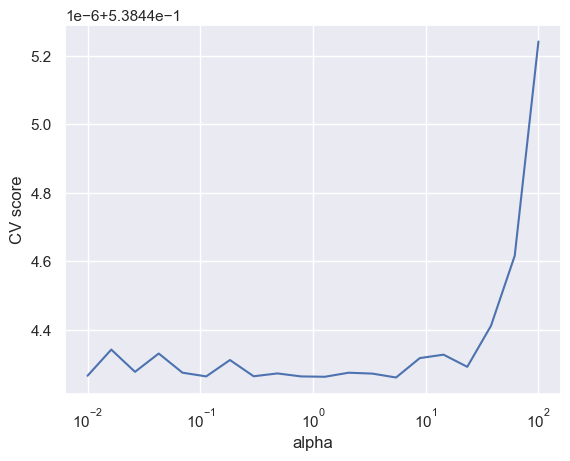

In [129]:
from sklearn.model_selection import GridSearchCV

alphas = np.logspace(-2, 2, 20)
searcher = GridSearchCV(Ridge_pipeline, [{"regression__alpha": alphas}], scoring="neg_root_mean_squared_error", cv=5)
searcher.fit(X_train[categorical2 + numeric_features], Y_train)

best_alpha = searcher.best_params_["regression__alpha"]
print("Best alpha = %.4f" % best_alpha)

plt.plot(alphas, -searcher.cv_results_["mean_test_score"])
plt.xscale("log")
plt.xlabel("alpha")
plt.ylabel("CV score")

In [130]:
Y_pred = searcher.predict(X_test)
print("RMSE Ridge validation= %.4f" % mean_squared_error(Y_test, y_pred, squared=False))

RMSE Ridge validation= 0.7979


C:\Users\annam\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Best alpha = 5.4556


Text(0, 0.5, 'CV score')

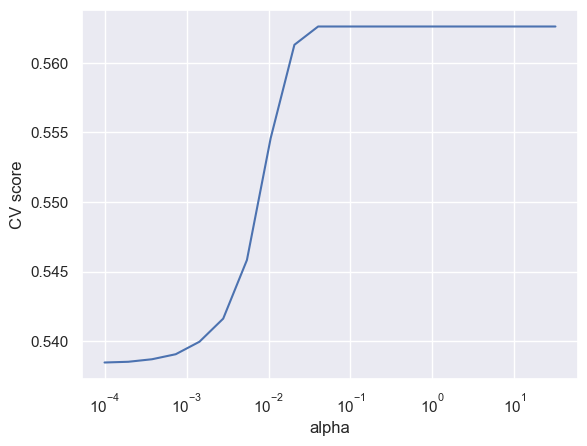

In [131]:
from sklearn.model_selection import GridSearchCV

alphas = np.logspace(-4, 1.5, 20)
searcher_lasso = GridSearchCV(lasso_pipeline, [{"regression__alpha": alphas}], scoring="neg_root_mean_squared_error", cv=5)
searcher_lasso.fit(X_train[categorical2 + numeric_features], Y_train)

best_alpha_lasso = searcher_lasso.best_params_["regression__alpha"]
print("Best alpha = %.4f" % best_alpha)

plt.plot(alphas, -searcher_lasso.cv_results_["mean_test_score"])
plt.xscale("log")
plt.xlabel("alpha")
plt.ylabel("CV score")

In [132]:
Y_pred = searcher_lasso.predict(X_test)
print("RMSE Ridge validation= %.4f" % mean_squared_error(Y_test, y_pred, squared=False))

RMSE Ridge validation= 0.7979


C:\Users\annam\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(




ПО НОВОЙ

In [133]:
X = train_df[['vendor_id', 'passenger_count', 'store_and_fwd_flag',
       'day_of_year', 'day_of_week', 'hour', 'month', 'anomal', 'probki', 'start_in_airport', 'finish_in_airport',
       'pickup_sector', 'dropoff_sector']]
Y = train_df['log_trip_duration']

In [134]:
categorical_features = ['vendor_id','store_and_fwd_flag',
        'day_of_week', 'anomal', 'probki', 'start_in_airport', 'finish_in_airport',
       'pickup_sector', 
       'dropoff_sector']
numeric_reatures = ['passenger_count', 'day_of_year', 'hour', 'month']

In [135]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=16)

In [136]:
column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical_features),
    ('scaling', StandardScaler(), numeric_reatures)
])

Lasso_pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Lasso())
])

Ridge_pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])

Lasso_model = Lasso_pipeline.fit(X_train, Y_train)
y_pred = Lasso_model.predict(X_test)
print("Test RMSE Lasso = %.4f" % root_mean_squared_error(Y_test, y_pred))

Ridge_model = Ridge_pipeline.fit(X_train, Y_train)
y_pred = Ridge_model.predict(X_test)
print("Test RMSE Ridge = %.4f" % root_mean_squared_error(Y_test, y_pred))

Test RMSE Lasso = 0.5622
Test RMSE Ridge = 0.5382


Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] END ............................regression__alpha=1e-05; total time= 1.1min
[CV] END ............................regression__alpha=1e-05; total time= 1.2min
[CV] END ............................regression__alpha=1e-05; total time= 1.1min
[CV] END ............................regression__alpha=1e-05; total time= 1.3min
[CV] END ............................regression__alpha=1e-05; total time= 1.1min
[CV] END ............regression__alpha=1.333521432163324e-05; total time=  39.8s
[CV] END ............regression__alpha=1.333521432163324e-05; total time=  49.2s
[CV] END ............regression__alpha=1.333521432163324e-05; total time=  42.1s
[CV] END ............regression__alpha=1.333521432163324e-05; total time=  43.9s
[CV] END ............regression__alpha=1.333521432163324e-05; total time=  42.2s
[CV] END ............regression__alpha=1.778279410038923e-05; total time=  28.4s
[CV] END ............regression__alpha=1.778279

Text(0, 0.5, 'CV score')

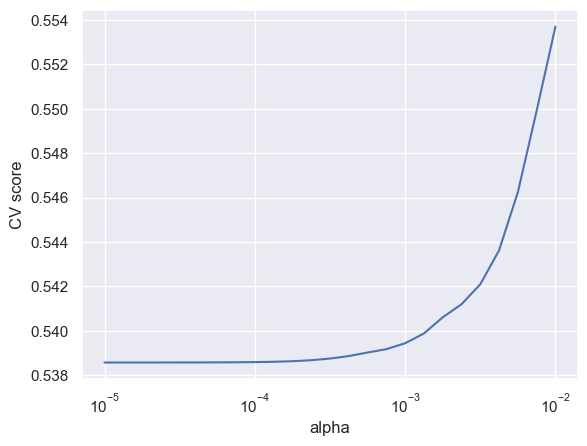

In [137]:
alphas = np.logspace(-5, -2, 25)
Lasso_searcher = GridSearchCV(Lasso_pipeline, [{"regression__alpha": alphas}], scoring="neg_root_mean_squared_error", cv=5, verbose=2)
Lasso_searcher.fit(X_train, Y_train)

Lasso_best_alpha = Lasso_searcher.best_params_["regression__alpha"]
print("Lasso best alpha = %.4f" % Lasso_best_alpha)

plt.plot(alphas, -Lasso_searcher.cv_results_["mean_test_score"])
plt.xscale("log")
plt.xlabel("alpha")
plt.ylabel("CV score")

Ridge best alpha = 0.0055


Text(0, 0.5, 'CV score')

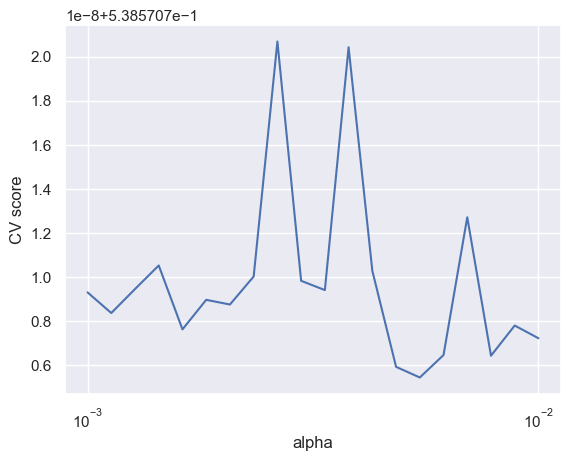

In [154]:
alphas = np.logspace(-2, -3, 20)
Ridge_searcher = GridSearchCV(Ridge_pipeline, [{"regression__alpha": alphas}], scoring="neg_root_mean_squared_error", cv=5)
Ridge_searcher.fit(X_train, Y_train)

Ridge_best_alpha = Ridge_searcher.best_params_["regression__alpha"]
print("Ridge best alpha = %.4f" % Ridge_best_alpha)

plt.plot(alphas, -Ridge_searcher.cv_results_["mean_test_score"])
plt.xscale("log")
plt.xlabel("alpha")
plt.ylabel("CV score")

In [155]:
y_pred = Lasso_searcher.predict(X_test)
print("Test RMSE Lasso = %.8f" % root_mean_squared_error(Y_test, y_pred))
y_pred = Ridge_searcher.predict(X_test)
print("Test RMSE Ridge = %.8f" % root_mean_squared_error(Y_test, y_pred))

Test RMSE Lasso = 0.53823922
Test RMSE Ridge = 0.53823844


Для каждого перебранного `alpha` для Lasso посчитайте количество нулевых весов в модели и нарисуйте график зависимости его от `alpha`. Как сильно придётся потерять в качестве, если мы хотим с помощью Lasso избавиться хотя бы от половины признаков?

In [164]:
zeros_count = []
zeros_count2 = []
for a in alphas:
    Lasso_pipeline = Pipeline(steps=[
        ('ohe_and_scaling', column_transformer),
        ('regression', Lasso(alpha = a))
    ])
    Lasso_model = Lasso_pipeline.fit(X_train, Y_train)
    zeros_count.append(np.sum(Lasso_pipeline.steps[-1][-1].coef_ == 0))
    zeros_count2.append(np.sum(Lasso_pipeline.named_steps['regression'].coef_ == 0))

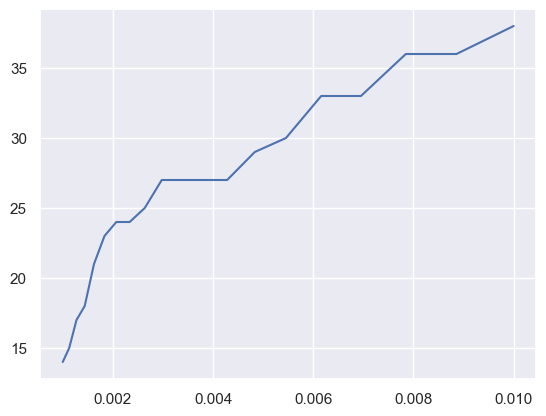

In [171]:
plt.plot(alphas, zeros_count)

<img src="https://www.dropbox.com/s/wp4jj0599np17lh/map_direction.png?raw=1" width="20%" align="right" style="margin-left: 20px">

**Задание 15 (1 балл)**. Часто бывает полезным использовать взаимодействия признаков (feature interactions), то есть строить новые признаки на основе уже существующих. Выше мы разбили карту Манхэттена на ячейки и придумали признаки "из какой ячейки началась поездка" и "в какой ячейке закончилась поездка".

Давайте попробуем сделать следующее: посчитаем, сколько раз встречается каждая возможная пара этих признаков в нашем датасете и выберем 100 самых частых пар. Закодируем поездки с этими частыми парами как категориальный признак, остальным объектам припишем -1. Получается, что мы закодировали, откуда и куда должно было ехать такси.

Также можете придумать ещё какой-нибудь способ сделать признаки про маршрут. Если эти признаки будут давать хороший прирост в качестве, то за это могут быть даны дополнительные бонусные баллы.

**Вопрос**: Почему такой признак потенциально полезный? Почему линейная модель не может самостоятельно "вытащить" эту информацию, ведь у нее в распоряжении есть признаки "из какой ячейки началась поездка" и "в какой ячейке закончилась поездка"?

In [184]:
pairs_of_sectors_df = train_df.groupby(by = ['pickup_sector', 'dropoff_sector']).aggregate({'passenger_count' : 'count'}).reset_index().\
    rename(columns = {'passenger_count' : 'trips_count'}).sort_values('trips_count', ascending=False).iloc[ : 100, : ]

In [187]:
pairs_of_sectors_df['route_number'] = np.arange(len(pairs_of_sectors_df))

In [199]:
pairs_of_sectors_df.loc[(pairs_of_sectors_df['pickup_sector'] == 5) & (pairs_of_sectors_df['dropoff_sector'] == 8), 'route_number'].values

array([], dtype=int32)

In [200]:
def get_route_number(row):
    data_row = pairs_of_sectors_df.loc[\
        (pairs_of_sectors_df['pickup_sector'] == row['pickup_sector']) & \
        (pairs_of_sectors_df['dropoff_sector'] == row['dropoff_sector']), 'route_number'].values
    if (len(data_row) == 0):
        return -1
    return data_row[0]

In [201]:
train_df['route_number'] = train_df.apply(get_route_number, axis = 1)

Заново обучите модель (`Ridge`, если она дала более высокое качество в предыдущих экспериментах, и `Lasso` иначе) на новых даннных и посчитайте качество на тестовой выборке

In [203]:
X = train_df[['vendor_id', 'passenger_count', 'store_and_fwd_flag',
       'day_of_year', 'day_of_week', 'hour', 'month', 'anomal', 'probki', 'start_in_airport', 'finish_in_airport',
       'pickup_sector', 'dropoff_sector', 'route_number']]
Y = train_df['log_trip_duration']

In [204]:
categorical_features = ['vendor_id','store_and_fwd_flag',
        'day_of_week', 'anomal', 'probki', 'start_in_airport', 'finish_in_airport',
       'pickup_sector', 
       'dropoff_sector', 'route_number']
numeric_reatures = ['passenger_count', 'day_of_year', 'hour', 'month']

In [205]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=16)

In [206]:
column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical_features),
    ('scaling', StandardScaler(), numeric_reatures)
])

Ridge_pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge(alpha = 0.0055))
])

Ridge_model = Ridge_pipeline.fit(X_train, Y_train)
y_pred = Ridge_model.predict(X_test)
print("Test RMSE Ridge = %.4f" % root_mean_squared_error(Y_test, y_pred))

Test RMSE Ridge = 0.4408


**Задание 16 (бонус, 1 балл)**. Где, как не для нашей задачи, считать манхэттенское расстояние?

**Вопрос**: Найдите, что такое манхэттенское расстояние и почему оно так называется. Как оно нам может помочь?

Введите систему координат на нашей карте так, чтобы оси были параллельны улицам Манхэттена, и добавьте сначала в данные признак "манхэттенское расстояние между пунктом отправления и пунктом назначения", а затем и логарифм этого признака. Посчитайте корреляцию между вашим новыми признаком и таргетом; между `log_haversine` и таргетом. В каком случае корреляция больше?

Нарисуйте карту, где покажете выбранные оси. Чтобы мы могли проверить вашу работу, просьба сделать скрин этой карты и приложить картинку (если мы откроем ваш ноутбук, виджеты отображаться не будут). 

In [143]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Заново обучите модель на новых даннных и посчитайте качество на тестовой выборке. Стало ли лучше? Объясните полученный результат.

In [144]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

**Задание 17 (бонус, 2 балла)**. Реализуйте трансформер, который строит разбиение карты по шестигранной решётке с помощью библиотеки [H3](https://github.com/uber/h3-py) и вычисляет признаки на основе такого разбиения.

Признаки могут быть самые разные: расстояние между точкой старта и финиша, посчитанное в количестве шестиугольников; статистика по числу поездок и по их продолжительности в соседних шестиугольниках.

Важно: производительность библиотеки существенно зависит от количества шестиугольников на карте (определяется параметром resolution). Подберите такое разрешение, при котором ваш код будет работать за приемлемое время.

При построении признаков старайтесь не допустить утечки целевой переменной (подробнее про это можно почитать в материалах 1-го семинара) — в противном случае хорошего качества на тестовой выборке достичь не получится.

Измерьте качество после добавления новых признаков. За улучшение функционала ошибки на каждые 0.005 на тестовой выборке будет даваться 0.5 бонусных балла. Можно получить до 2 бонусных баллов за это задание.

In [145]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Вставьте картинку, описывающую ваш опыт выполнения этого ДЗ.